# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/2005028997_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1889757798_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/247162961_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1890266440_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1863655430_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1446001495_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Usi

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/2005028997_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
2:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
6:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]


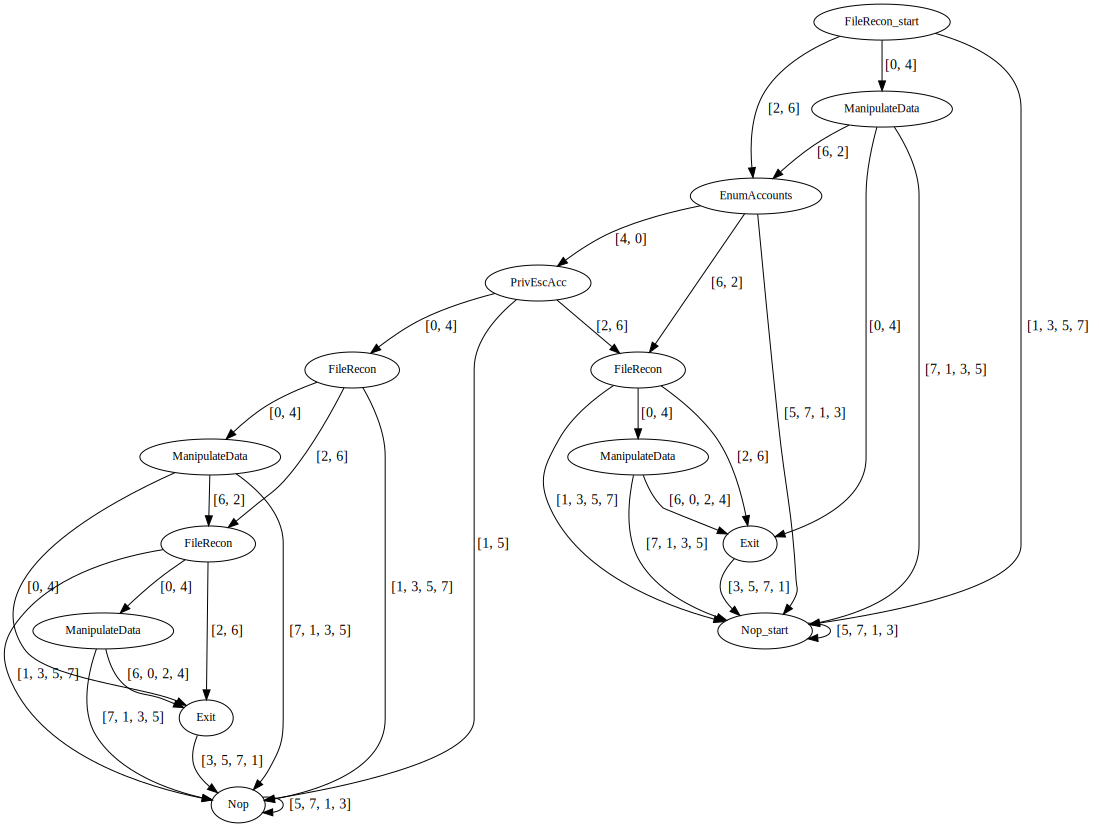

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1889757798_attl0_pol_graph.json
Edge map is:
0:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
3:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
4:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]


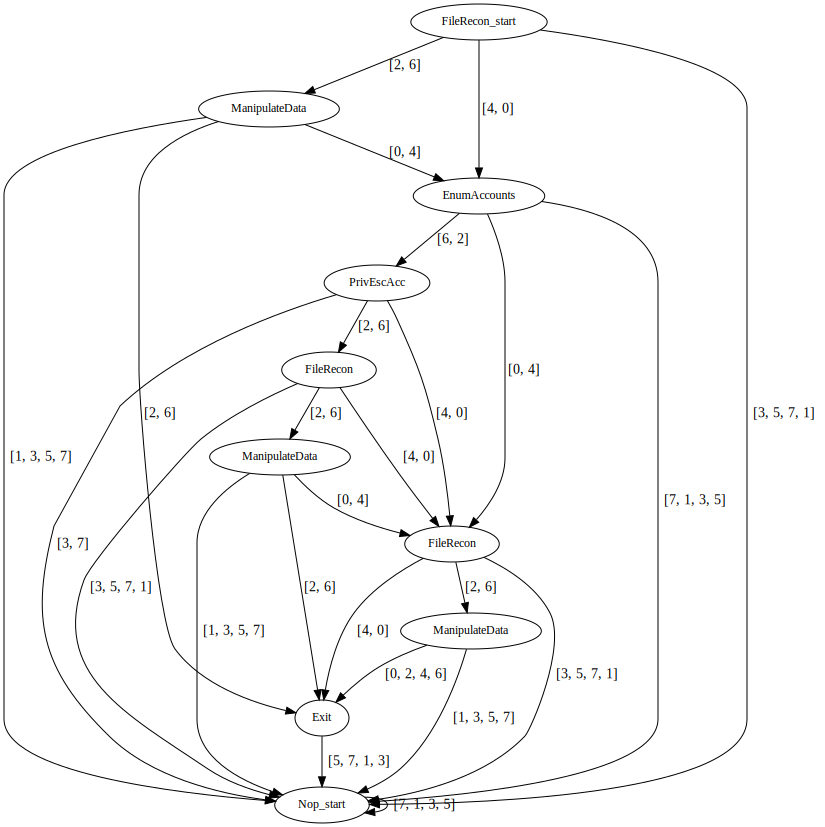

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/247162961_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


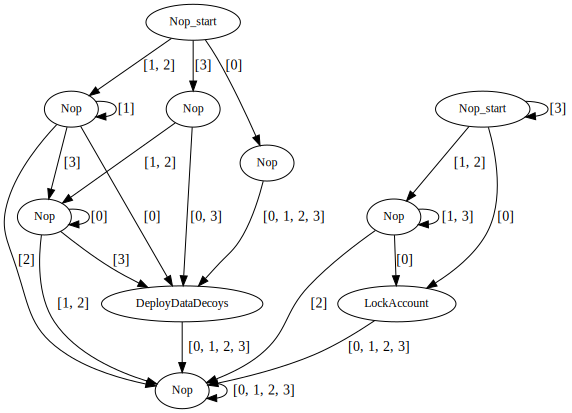

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1890266440_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


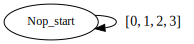

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1863655430_attl2_pol_graph.json
Edge map is:
0:[(HostObs, user_files), (ActionResult, success), (ConnObs, inactive)]
1:[(HostObs, none), (ActionResult, failure), (ConnObs, inactive)]
2:[(HostObs, none), (ActionResult, success), (ConnObs, inactive)]
3:[(HostObs, user_files), (ActionResult, failure), (ConnObs, inactive)]
4:[(HostObs, none), (ActionResult, success), (ConnObs, active)]
5:[(HostObs, user_files), (ActionResult, failure), (ConnObs, active)]
6:[(HostObs, user_files), (ActionResult, success), (ConnObs, active)]
7:[(HostObs, none), (ActionResult, failure), (ConnObs, active)]


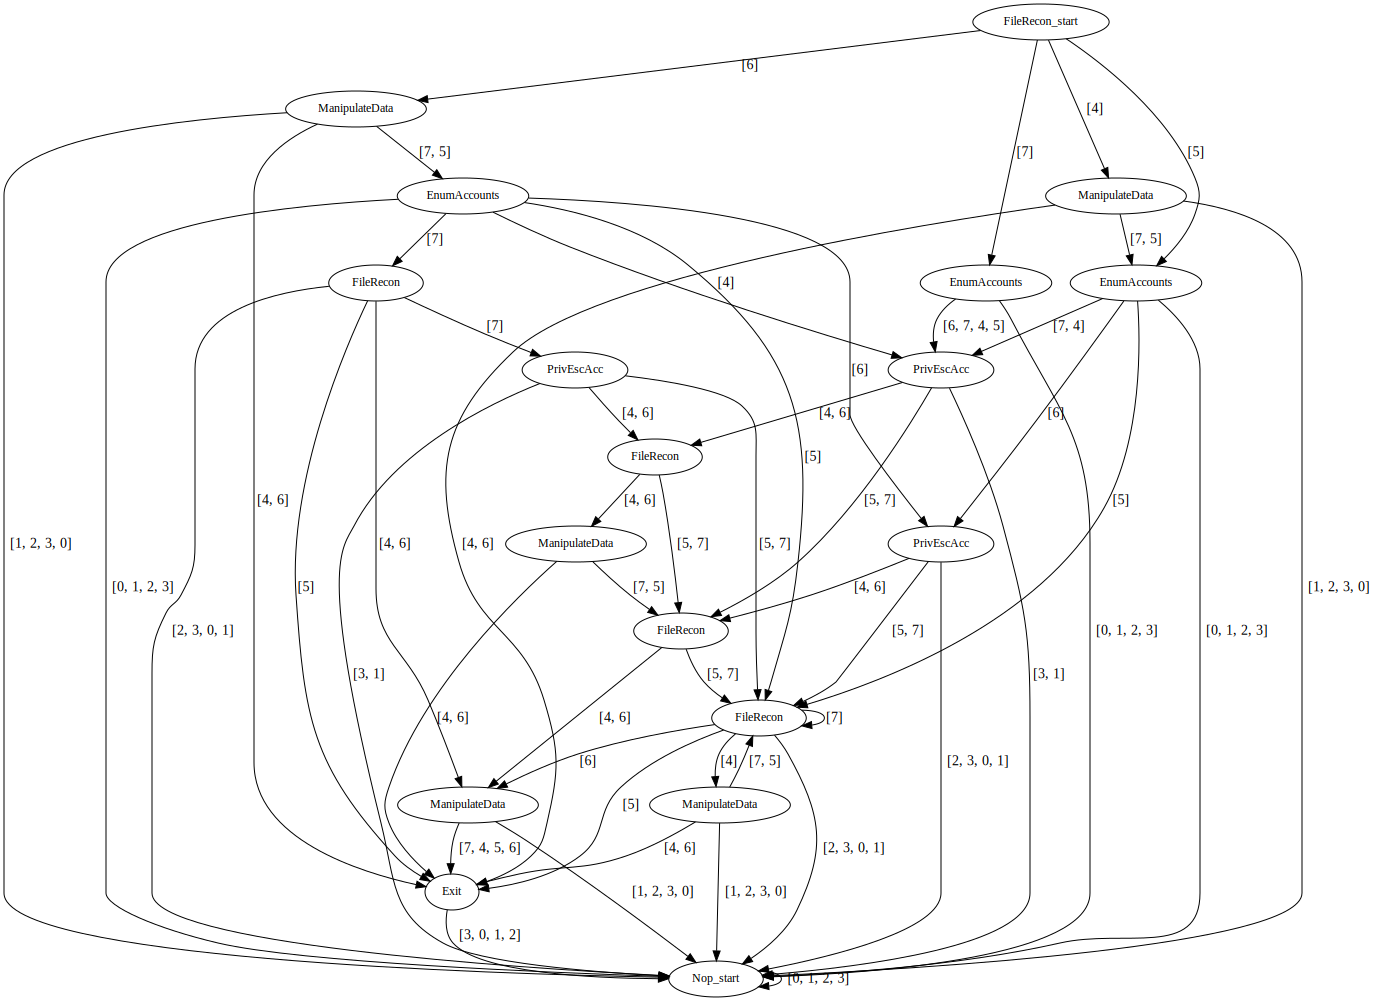

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1446001495_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


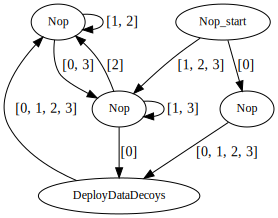

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.10.json
Using tra

+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                         su_login
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

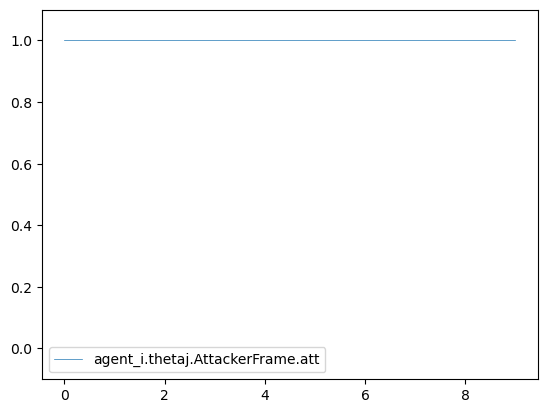

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.333533                        0.666467   
4                         0.626335                        0.373665   
5                         0.668767                        0.331233   
6                         0.668767                        0.331233   
7                         0.668767                        0.331233   
8                         0.668767                        0.331233   
9                         0.668767                        0.331233   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

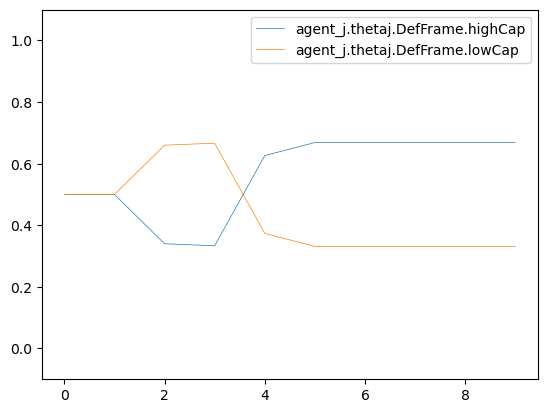

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

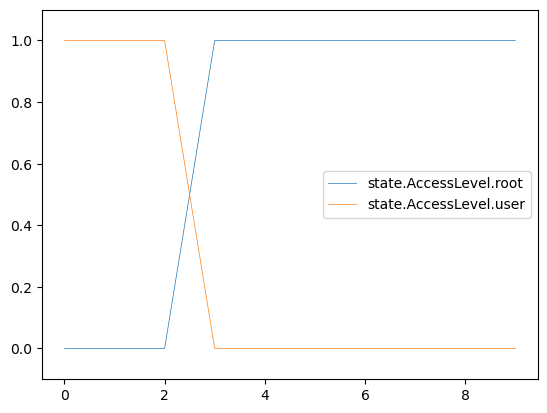

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.990261                  0.009739               Nop   
4                  0.990286                  0.009714               Nop   
5                  0.990285                  0.009715               Nop   
6                  0.996332                  0.003668               Nop   
7                  0.996430                  0.003570               Nop   
8                  0.996432                  0.003568               Nop   
9                  0.996432                  0.003568               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

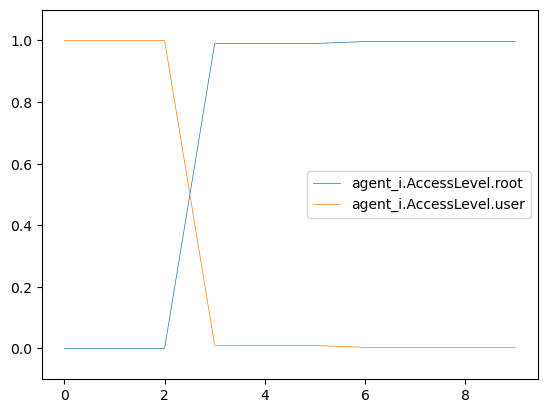

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999886                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999961                  0.000039            Exit   
6                  0.999961                  0.000039             Nop   
7                  0.999961                  0.000039             Nop   
8                  0.999961                  0.000039             Nop   
9                  0.999961                  0.000039             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

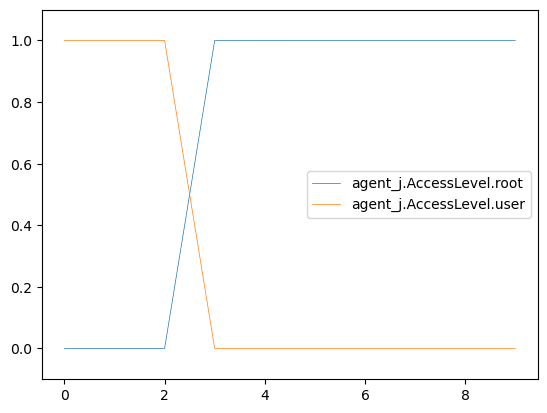

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

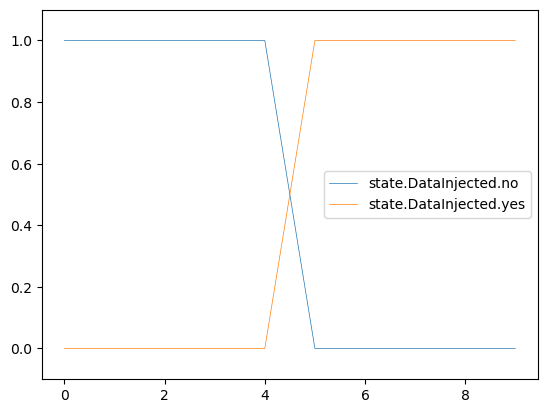

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.287004                  0.712996               Nop   
6                 0.006639                  0.993360               Nop   
7                 0.005283                  0.994717               Nop   
8                 0.005279                  0.994721               Nop   
9                 0.005279                  0.994721               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

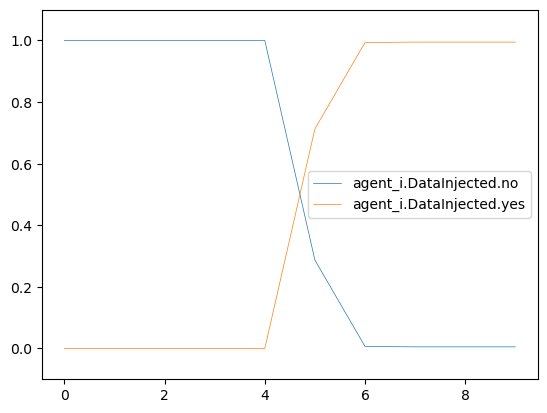

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000097                  0.999903            Exit   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

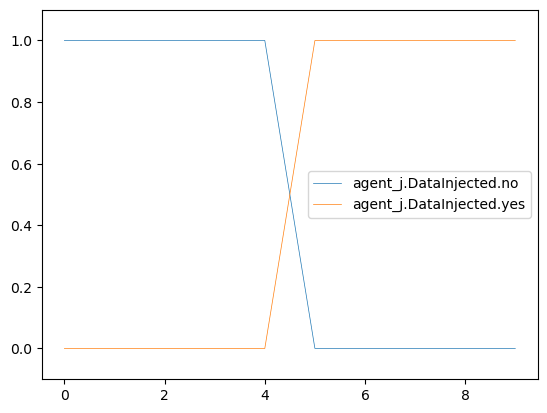

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

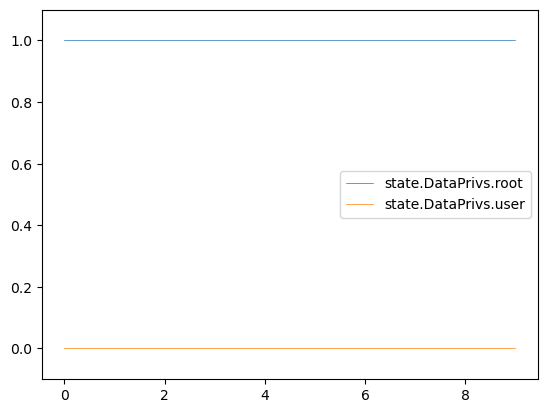

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

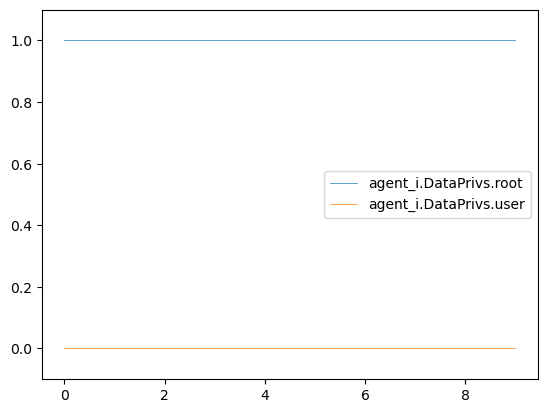

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.647412                0.352588  ManipulateData   
5                0.656582                0.343418            Exit   
6                0.656582                0.343418             Nop   
7                0.656582                0.343418             Nop   
8                0.656582                0.343418             Nop   
9                0.656582                0.343418             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

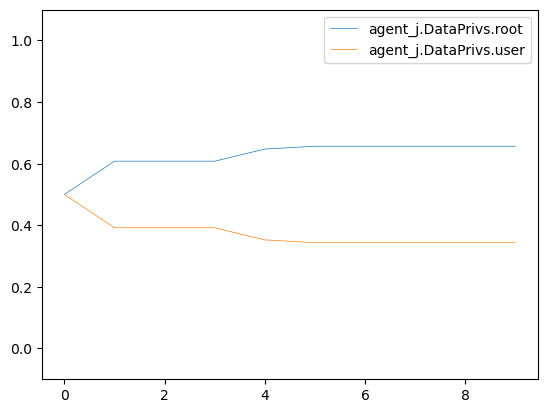

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

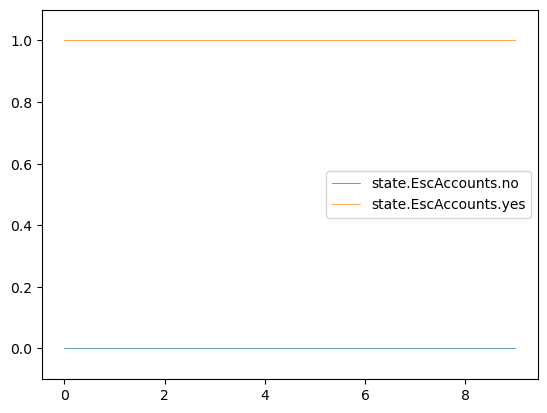

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

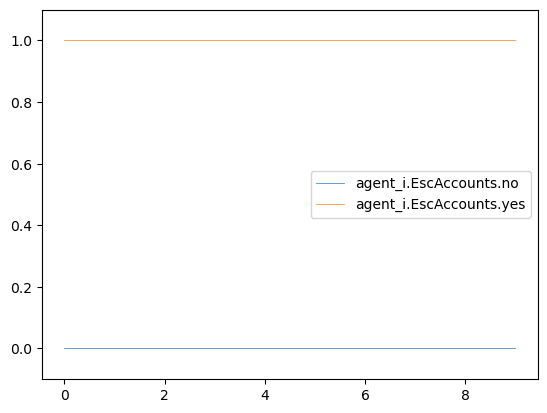

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899193      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000053                 0.999947  ManipulateData   
5                0.000039                 0.999961            Exit   
6                0.000039                 0.999962             Nop   
7                0.000039                 0.999961             Nop   
8                0.000039                 0.999961             Nop   
9                0.000039                 0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

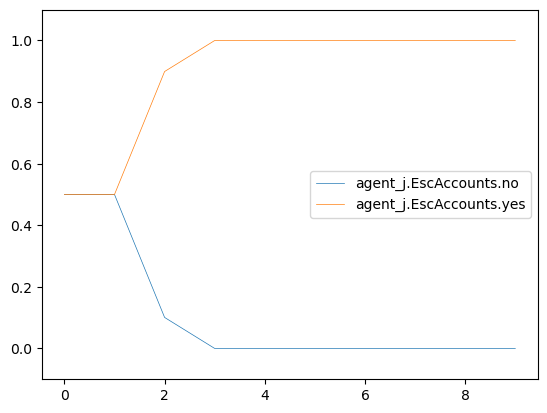

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

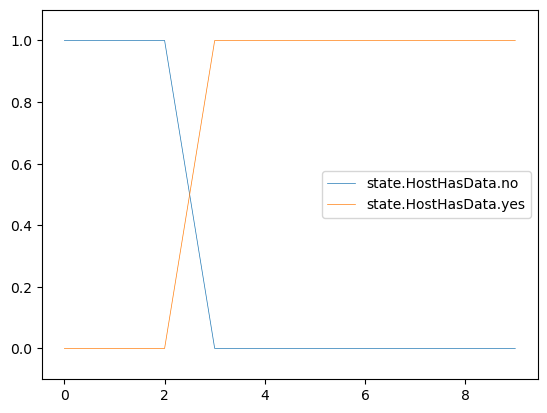

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

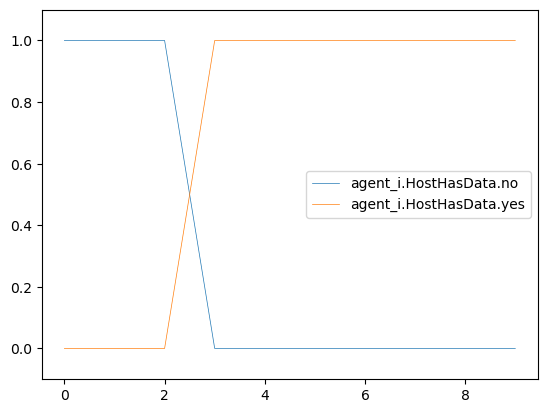

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.405628                 0.594372       FileRecon   
4                0.064020                 0.935980  ManipulateData   
5                0.000070                 0.999930            Exit   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

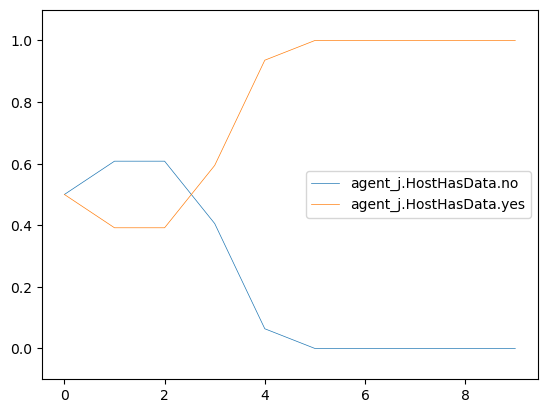

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

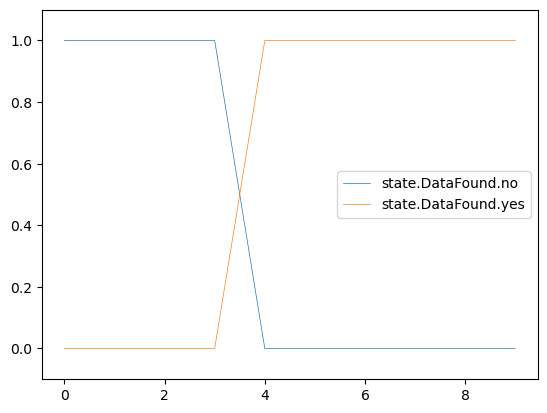

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.207772               0.792229               Nop   
5              0.065185               0.934815               Nop   
6              0.005292               0.994708               Nop   
7              0.005034               0.994966               Nop   
8              0.005032               0.994968               Nop   
9              0.005032               0.994968               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

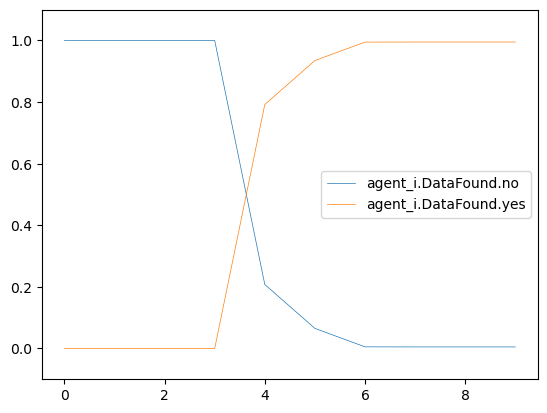

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.088100               0.911900  ManipulateData   
5              0.000097               0.999903            Exit   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

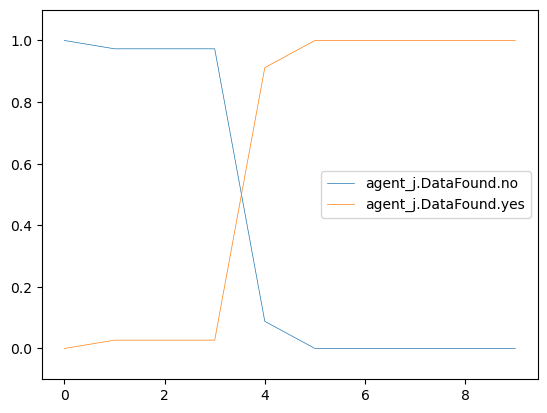

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

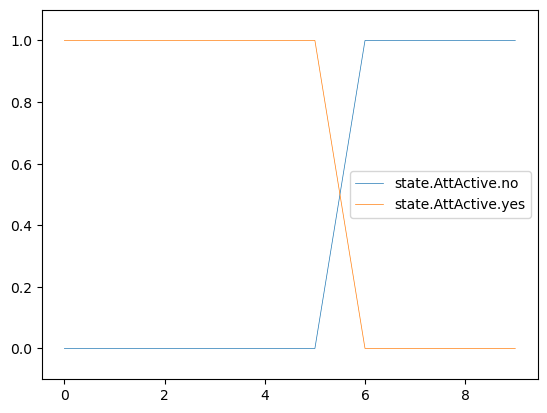

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998821e-01  DeployDataDecoys   
3          1.234496e-06           9.999988e-01               Nop   
4          9.572720e-08           1.000000e+00               Nop   
5          1.506945e-05           9.999849e-01               Nop   
6          9.949408e-01           5.059142e-03               Nop   
7          9.999824e-01           1.772236e-05               Nop   
8          9.999999e-01           5.373726e-08               Nop   
9          1.000000e+00           2.486448e-10               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

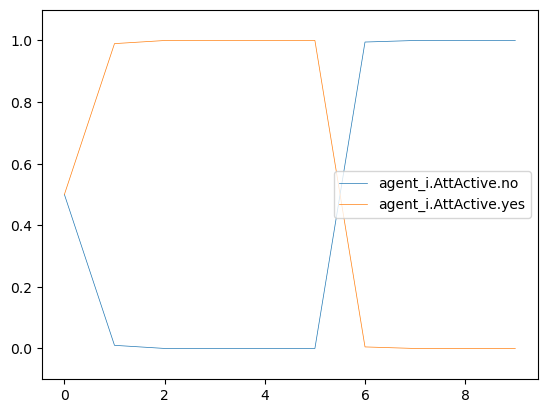

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

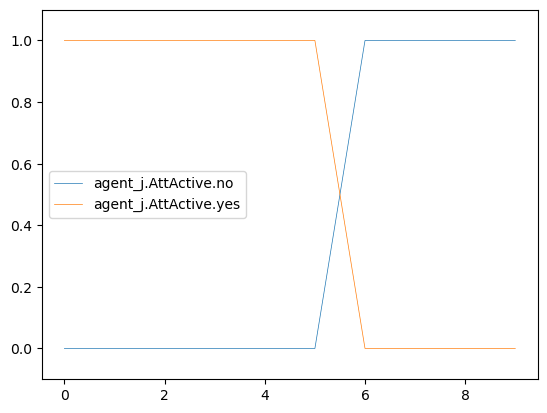

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

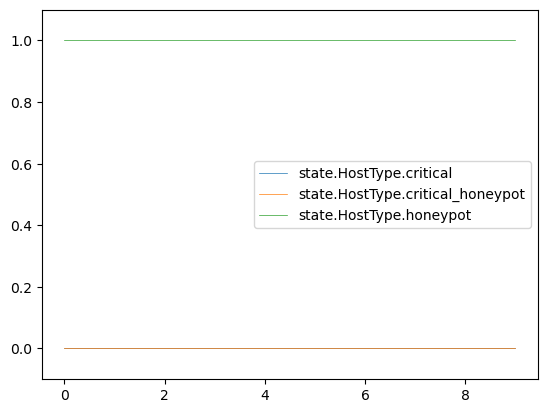

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                         su_login  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

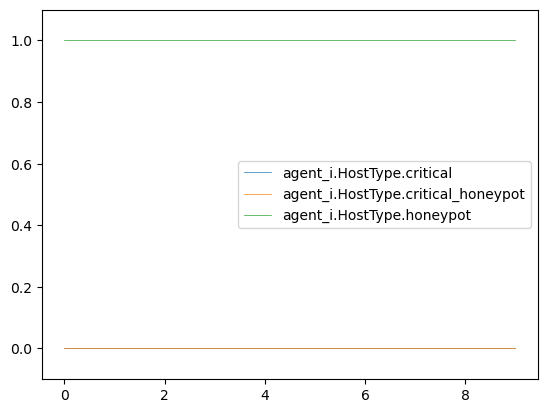

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.800000                                 0.0   
2                   0.339934                                 0.0   
3                   0.333533                                 0.0   
4                   0.074800                                 0.0   
5                   0.066262                                 0.0   
6                   0.066262                                 0.0   
7                   0.066262                                 0.0   
8                   0.066262                                 0.0   
9                   0.066262                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.200000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.666467       FileRecon               Nop   
4                   0.925200  ManipulateData               Nop   
5                   0.933738            Exit               Nop   
6                   0.933738             Nop               Nop   
7                   0.933738             Nop               Nop   
8                   0.933738             Nop               Nop   
9                   0.933738             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                   user_files                           failure   
1                         none                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

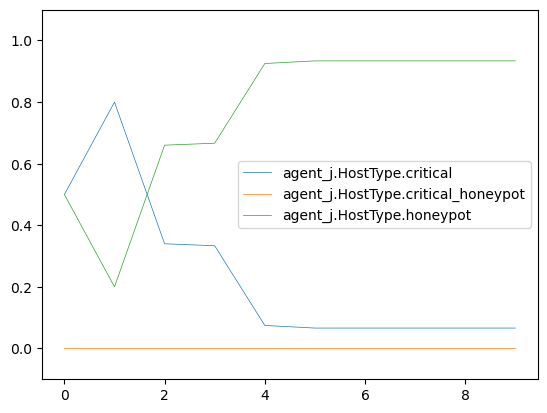

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

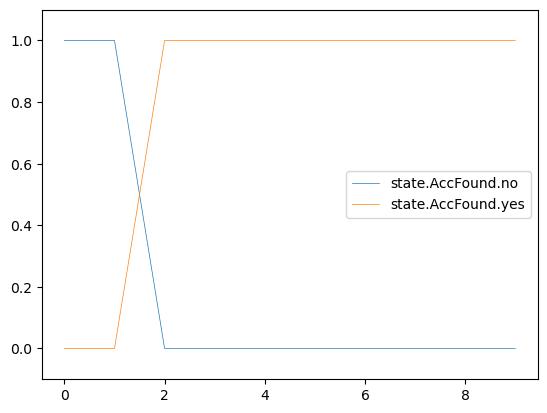

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.009686              0.990314               Nop   
4             0.009684              0.990316               Nop   
5             0.009685              0.990315               Nop   
6             0.003654              0.996346               Nop   
7             0.003556              0.996444               Nop   
8             0.003555              0.996445               Nop   
9             0.003555              0.996445               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                         su_login  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

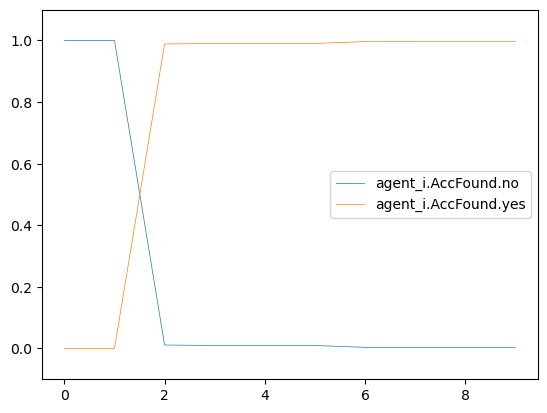

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898185      PrivEscAcc   
3             0.000113              0.999886       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000039              0.999961            Exit   
6             0.000039              0.999961             Nop   
7             0.000039              0.999961             Nop   
8             0.000039              0.999961             Nop   
9             0.000039              0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                   user_files   
1               Nop                         none   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           success                     inactive

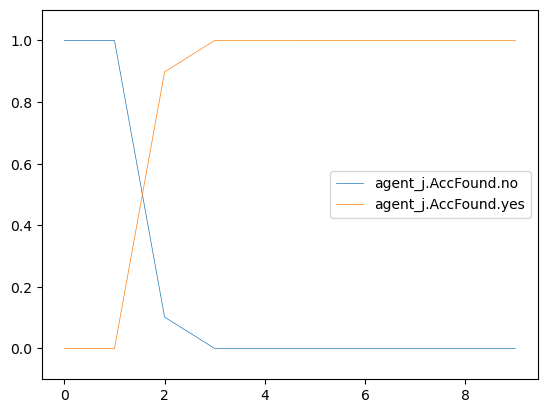

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

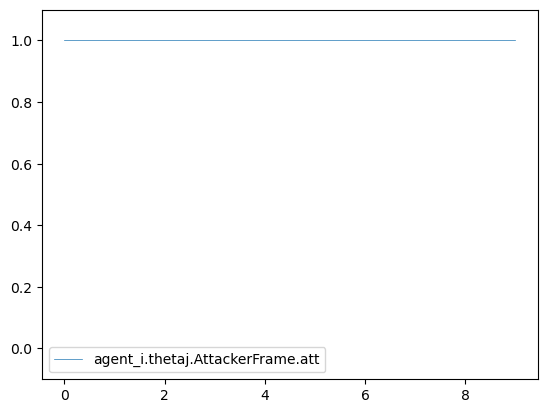

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.333533                        0.666467   
4                         0.626335                        0.373665   
5                         0.668767                        0.331233   
6                         0.668767                        0.331233   
7                         0.668767                        0.331233   
8                         0.668767                        0.331233   
9                         0.668767                        0.331233   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

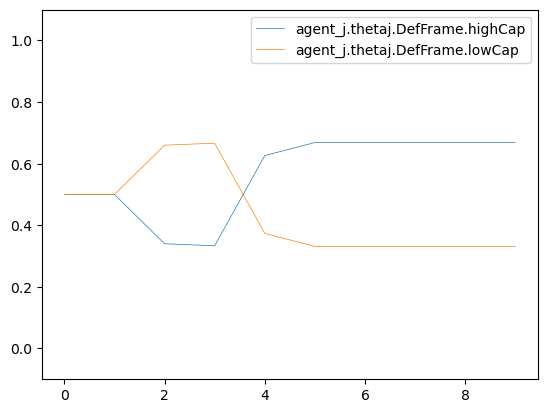

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

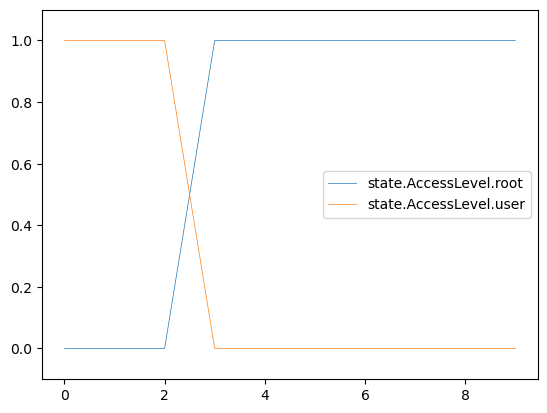

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.990261                  0.009739               Nop   
4                  0.990286                  0.009714               Nop   
5                  0.998555                  0.001445               Nop   
6                  0.998622                  0.001378               Nop   
7                  0.998623                  0.001376               Nop   
8                  0.998624                  0.001376               Nop   
9                  0.998624                  0.001376               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

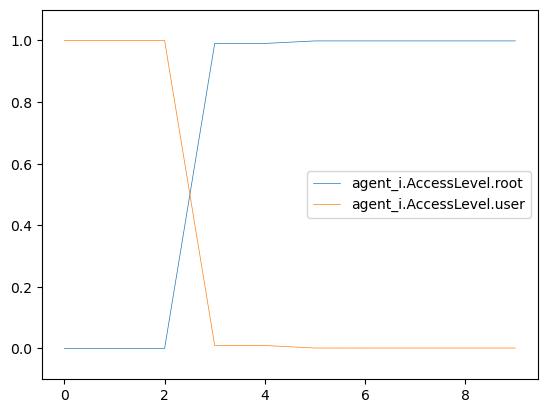

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999886                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999961                  0.000039            Exit   
6                  0.999961                  0.000039             Nop   
7                  0.999961                  0.000039             Nop   
8                  0.999961                  0.000039             Nop   
9                  0.999961                  0.000039             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

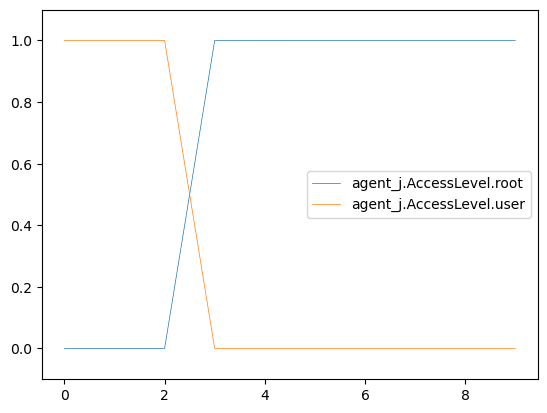

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

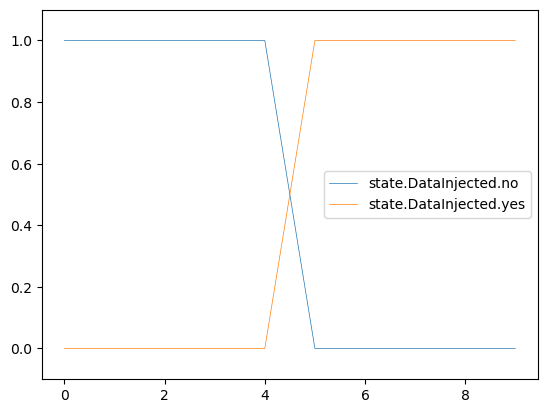

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031940                  0.968060               Nop   
6                 0.002792                  0.997208               Nop   
7                 0.002476                  0.997524               Nop   
8                 0.002471                  0.997529               Nop   
9                 0.002471                  0.997529               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

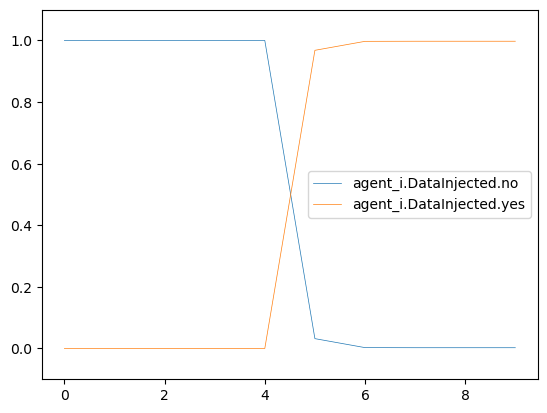

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000097                  0.999903            Exit   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

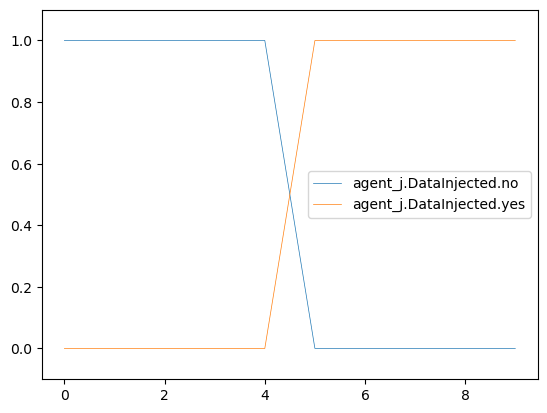

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

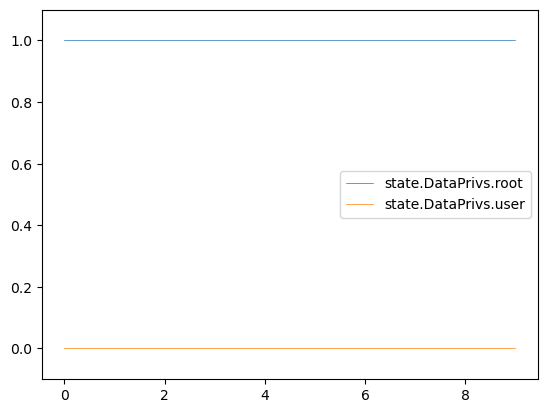

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

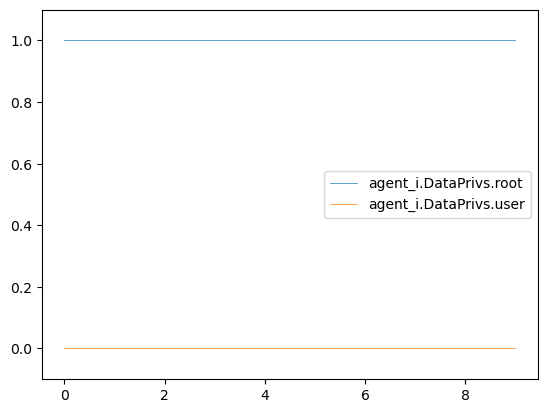

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.647412                0.352588  ManipulateData   
5                0.656582                0.343418            Exit   
6                0.656582                0.343418             Nop   
7                0.656582                0.343418             Nop   
8                0.656582                0.343418             Nop   
9                0.656582                0.343418             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

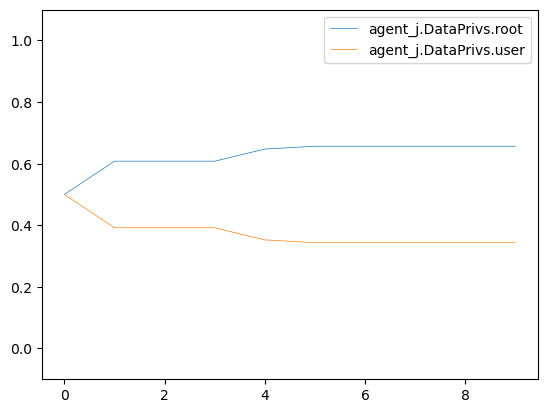

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

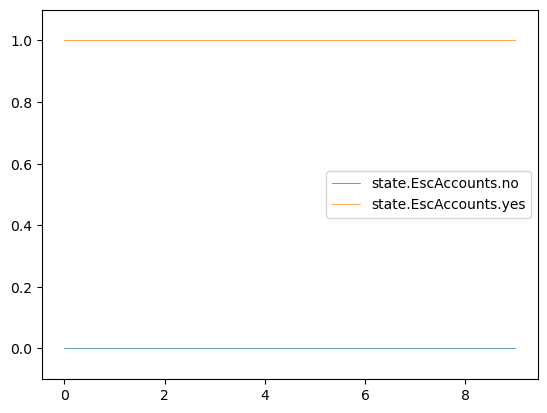

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

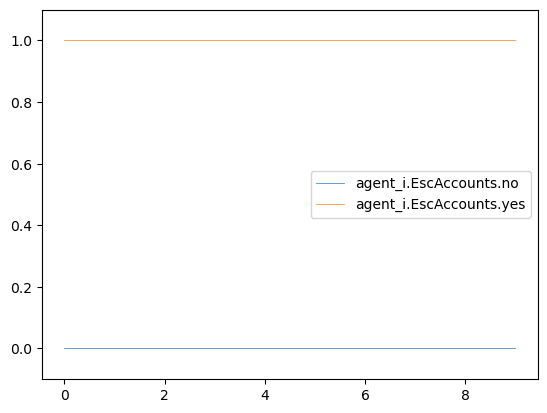

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899193      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000053                 0.999947  ManipulateData   
5                0.000039                 0.999961            Exit   
6                0.000039                 0.999962             Nop   
7                0.000039                 0.999961             Nop   
8                0.000039                 0.999961             Nop   
9                0.000039                 0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

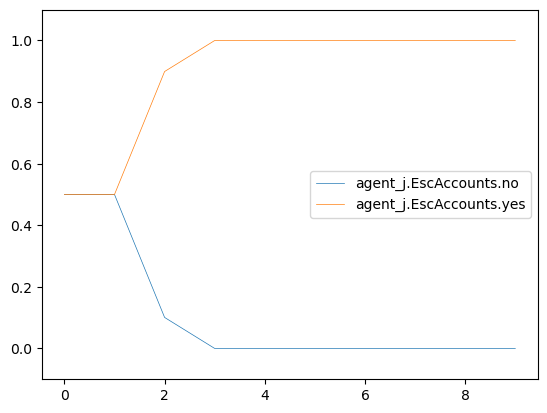

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

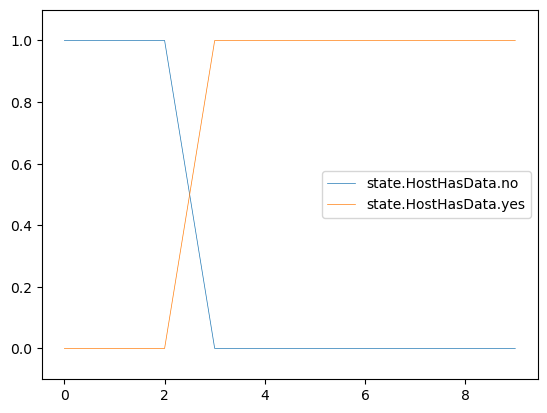

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

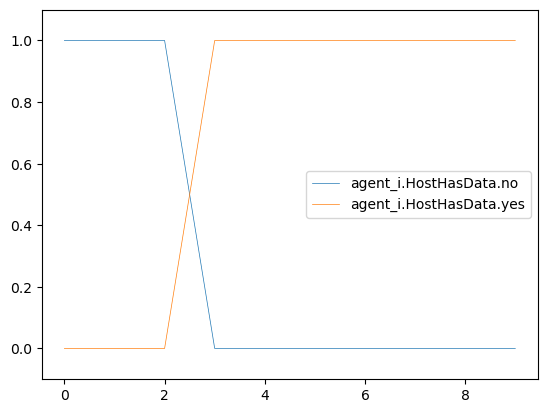

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.405628                 0.594372       FileRecon   
4                0.064020                 0.935980  ManipulateData   
5                0.000070                 0.999930            Exit   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

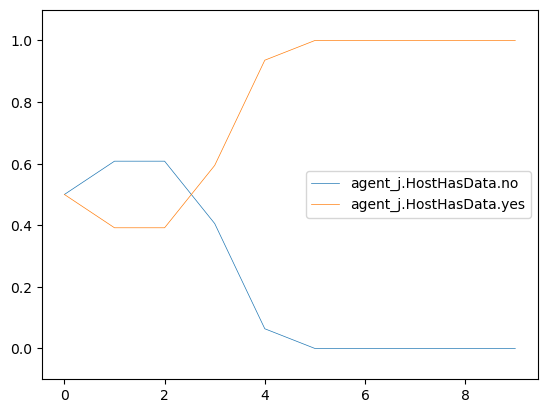

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

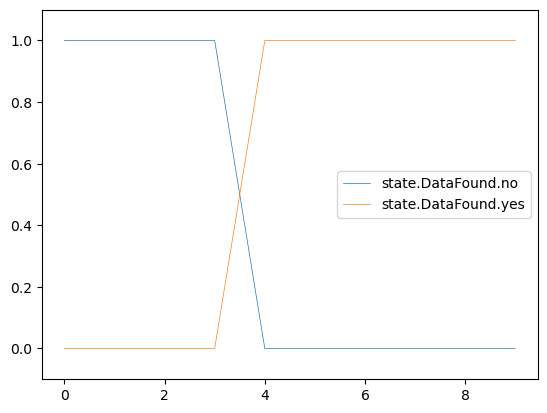

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.207772               0.792229               Nop   
5              0.028835               0.971165               Nop   
6              0.002507               0.997493               Nop   
7              0.002469               0.997531               Nop   
8              0.002468               0.997532               Nop   
9              0.002468               0.997532               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

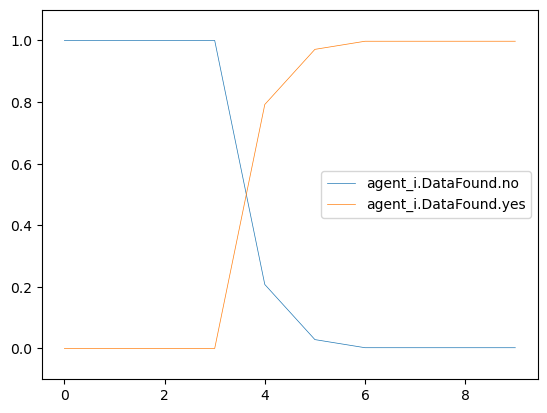

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.088100               0.911900  ManipulateData   
5              0.000097               0.999903            Exit   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

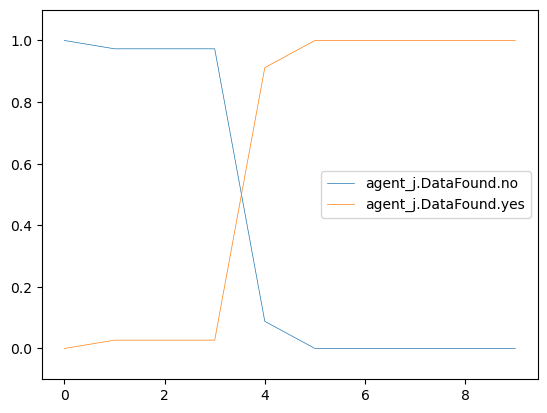

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

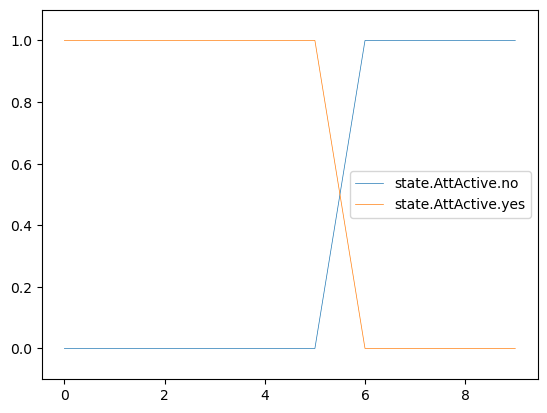

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998821e-01  DeployDataDecoys   
3          1.234496e-06           9.999988e-01               Nop   
4          9.572720e-08           1.000000e+00               Nop   
5          4.218627e-06           9.999957e-01               Nop   
6          9.995967e-01           4.032651e-04               Nop   
7          9.986761e-01           1.323904e-03               Nop   
8          9.999999e-01           6.937771e-08               Nop   
9          9.999999e-01           2.777506e-10               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

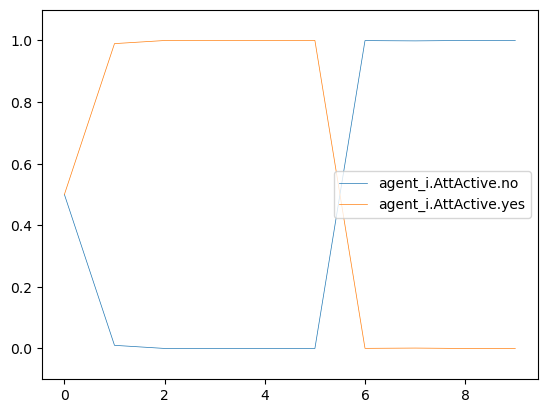

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

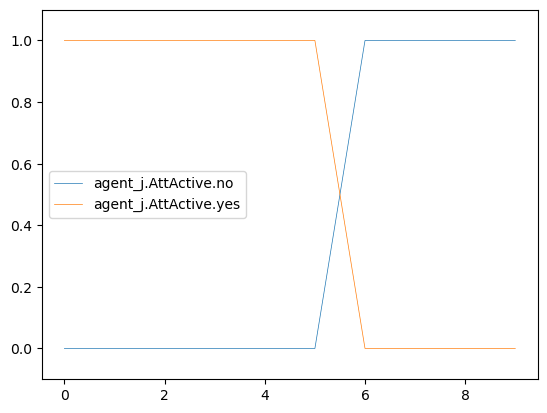

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

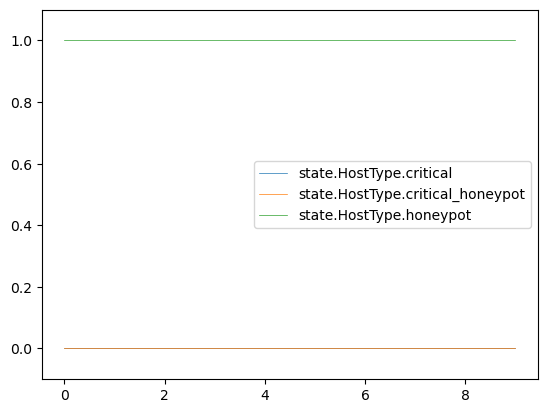

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

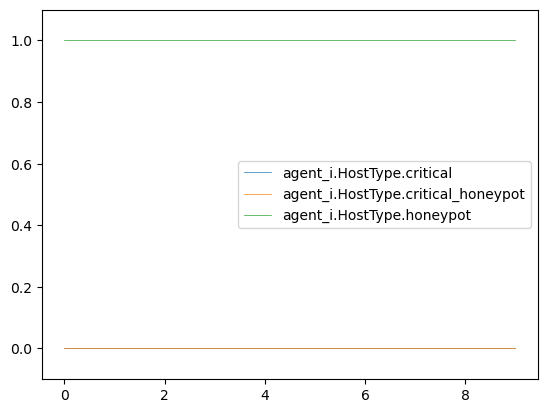

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.339934                                 0.0   
3                   0.333533                                 0.0   
4                   0.074800                                 0.0   
5                   0.066262                                 0.0   
6                   0.066262                                 0.0   
7                   0.066262                                 0.0   
8                   0.066262                                 0.0   
9                   0.066262                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.800000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.666467       FileRecon               Nop   
4                   0.925200  ManipulateData               Nop   
5                   0.933738            Exit               Nop   
6                   0.933738             Nop               Nop   
7                   0.933738             Nop               Nop   
8                   0.933738             Nop               Nop   
9                   0.933738             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                   user_files                           success   
3                         none                           success   
4                   user_files                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

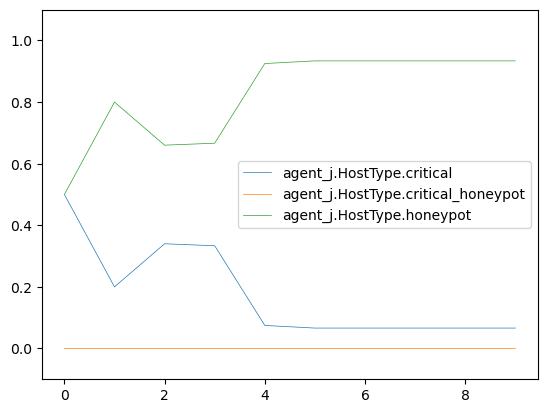

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

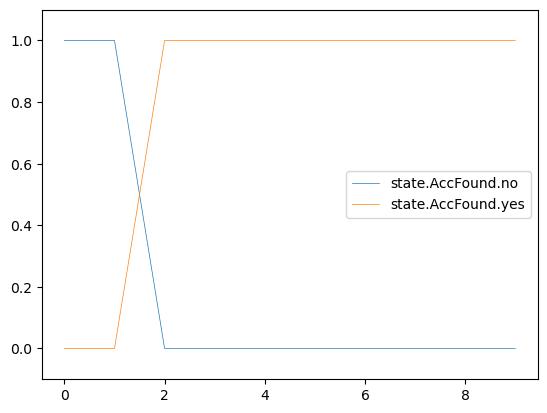

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.009686              0.990314               Nop   
4             0.009684              0.990316               Nop   
5             0.001439              0.998561               Nop   
6             0.001376              0.998624               Nop   
7             0.001374              0.998626               Nop   
8             0.001373              0.998627               Nop   
9             0.001373              0.998627               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

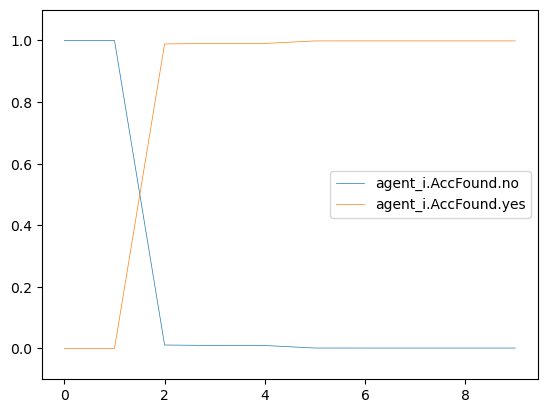

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898185      PrivEscAcc   
3             0.000113              0.999886       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000039              0.999961            Exit   
6             0.000039              0.999961             Nop   
7             0.000039              0.999961             Nop   
8             0.000039              0.999961             Nop   
9             0.000039              0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                   user_files   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

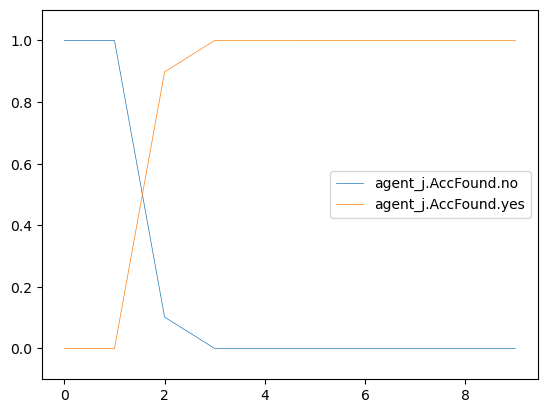

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                        file_enum
5                               1.0                       file_write
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

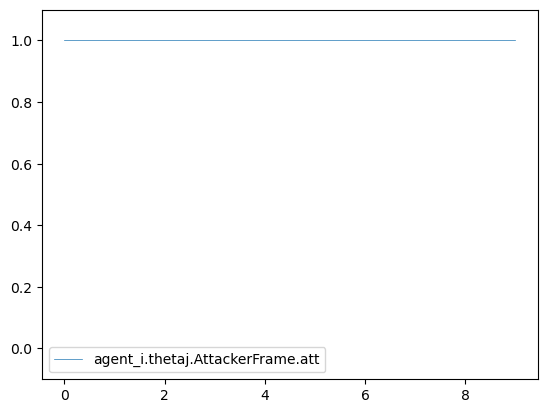

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.333533                        0.666467   
4                         0.241155                        0.758845   
5                         0.590352                        0.409648   
6                         0.710864                        0.289136   
7                         0.710864                        0.289136   
8                         0.710864                        0.289136   
9                         0.710864                        0.289136   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

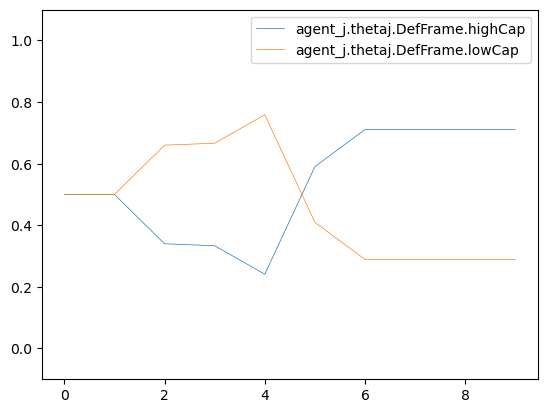

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

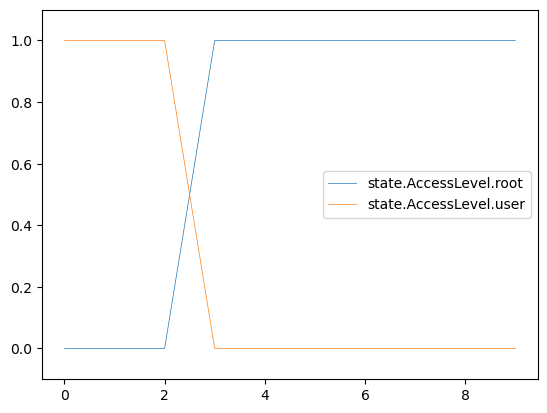

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.990261                  0.009739               Nop   
4                  0.990286                  0.009714               Nop   
5                  0.968076                  0.031924               Nop   
6                  0.993885                  0.006115               Nop   
7                  0.997452                  0.002548               Nop   
8                  0.997490                  0.002510               Nop   
9                  0.997490                  0.002510               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

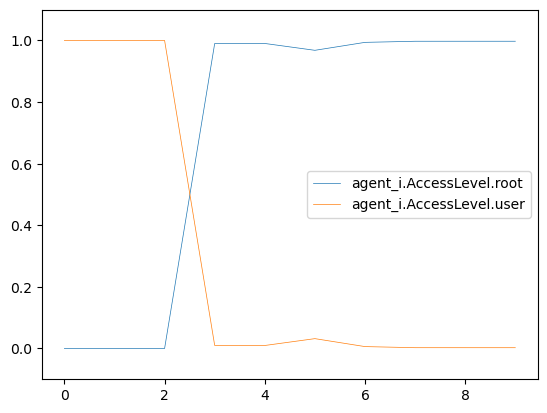

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999886                  0.000113       FileRecon   
4                  0.999819                  0.000181       FileRecon   
5                  0.999922                  0.000078  ManipulateData   
6                  0.999963                  0.000037            Exit   
7                  0.999963                  0.000037             Nop   
8                  0.999963                  0.000037             Nop   
9                  0.999963                  0.000037             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

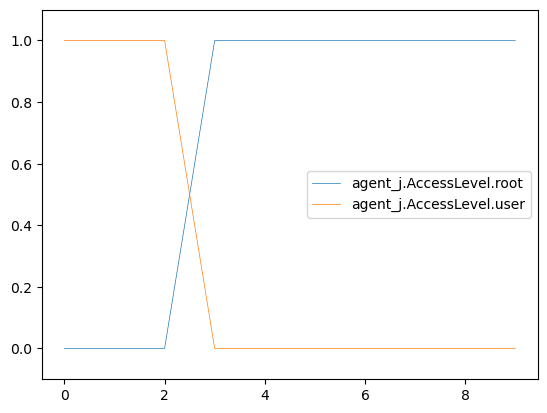

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

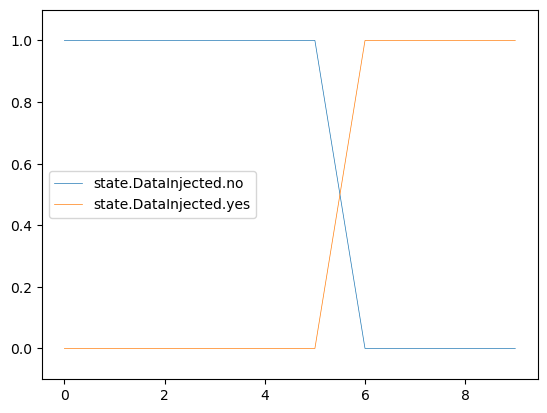

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.973150                  0.026850               Nop   
6                 0.026475                  0.973525               Nop   
7                 0.019933                  0.980067               Nop   
8                 0.019884                  0.980116               Nop   
9                 0.019884                  0.980116               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

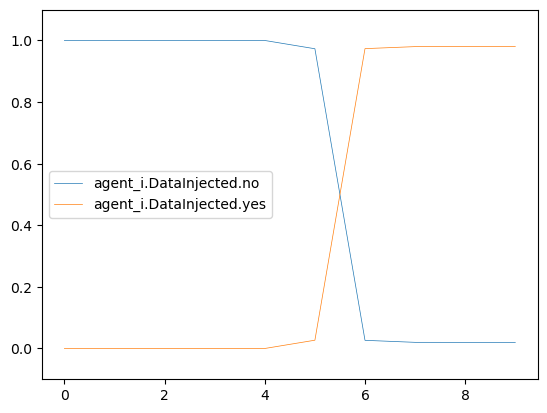

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000       FileRecon   
5                 1.000000                  0.000000  ManipulateData   
6                 0.000226                  0.999774            Exit   
7                 0.000226                  0.999774             Nop   
8                 0.000226                  0.999774             Nop   
9                 0.000226                  0.999774             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

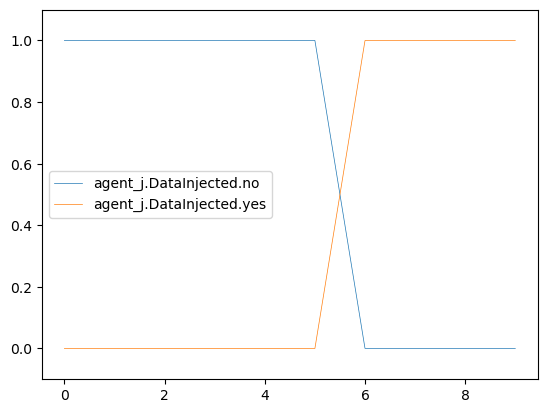

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

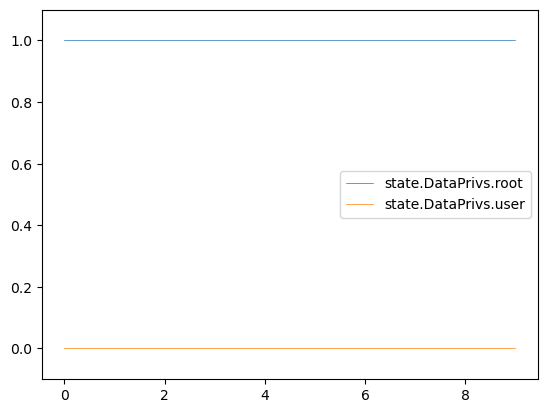

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

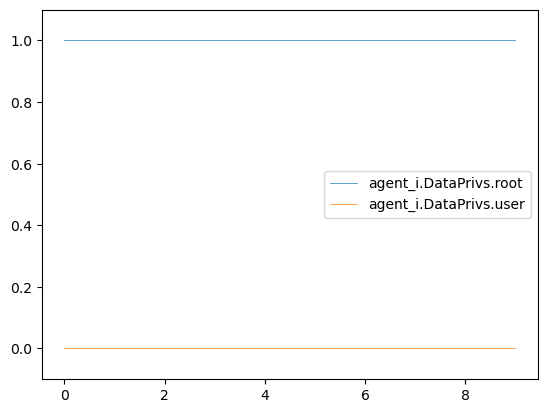

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.564155                0.435845       FileRecon   
5                0.642971                0.357029  ManipulateData   
6                0.671971                0.328029            Exit   
7                0.671971                0.328029             Nop   
8                0.671971                0.328029             Nop   
9                0.671971                0.328029             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

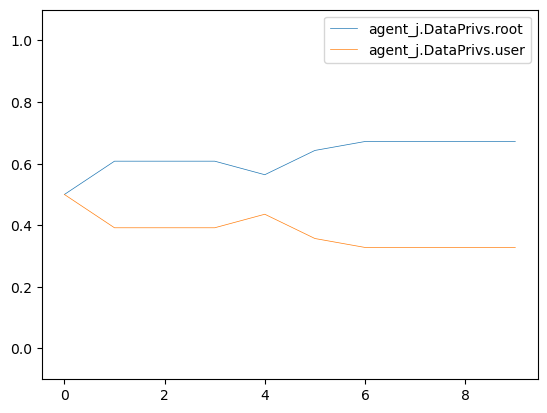

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

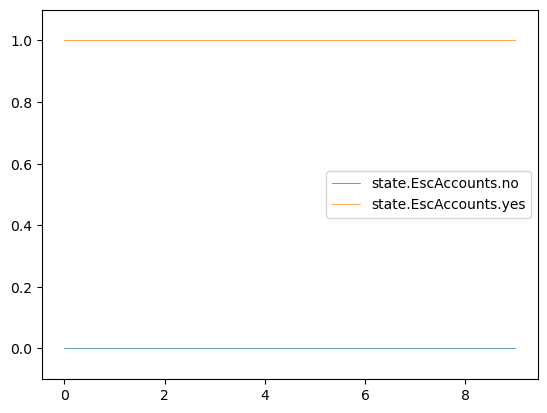

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

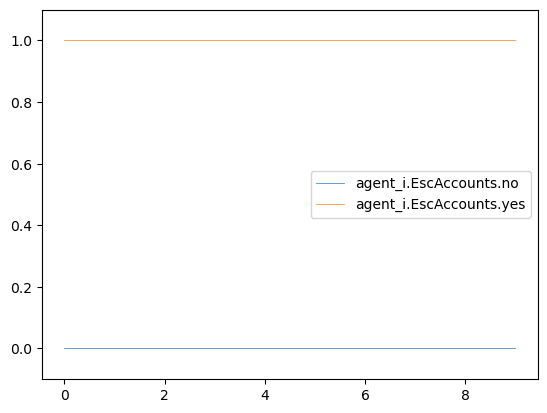

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899193      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000179                 0.999821       FileRecon   
5                0.000077                 0.999923  ManipulateData   
6                0.000037                 0.999963            Exit   
7                0.000037                 0.999963             Nop   
8                0.000037                 0.999963             Nop   
9                0.000037                 0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

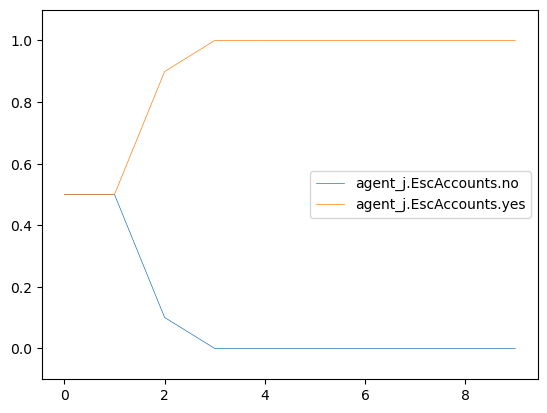

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4       FileRecon  
5  ManipulateData  
6            Exit  
7             Nop  
8             Nop  
9             Nop

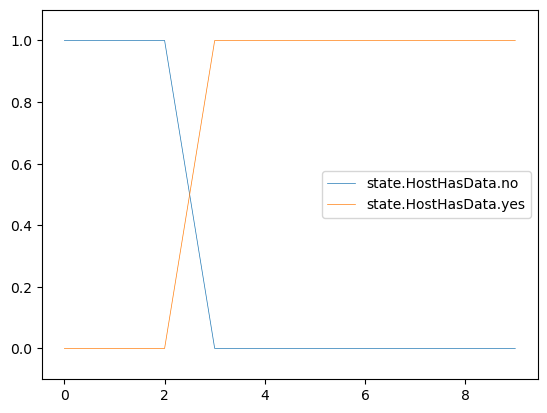

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

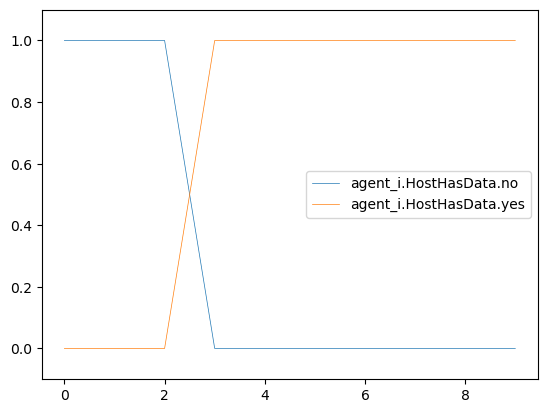

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.405628                 0.594372       FileRecon   
4                0.644336                 0.355664       FileRecon   
5                0.169878                 0.830122  ManipulateData   
6                0.000208                 0.999792            Exit   
7                0.000208                 0.999792             Nop   
8                0.000208                 0.999792             Nop   
9                0.000208                 0.999792             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

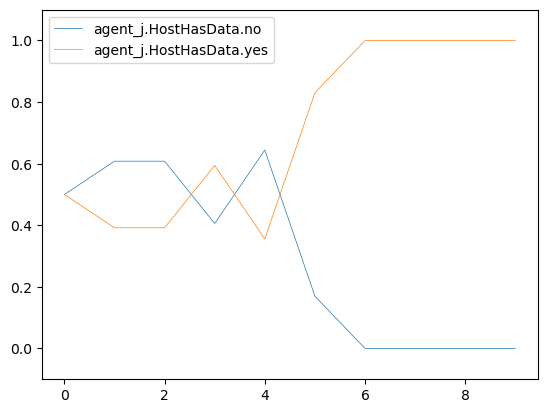

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 1.0                  0.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

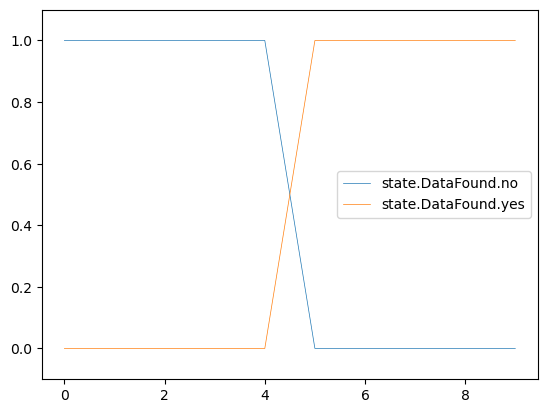

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.207772               0.792229               Nop   
5              0.162890               0.837110               Nop   
6              0.023934               0.976066               Nop   
7              0.019710               0.980291               Nop   
8              0.019671               0.980329               Nop   
9              0.019670               0.980330               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

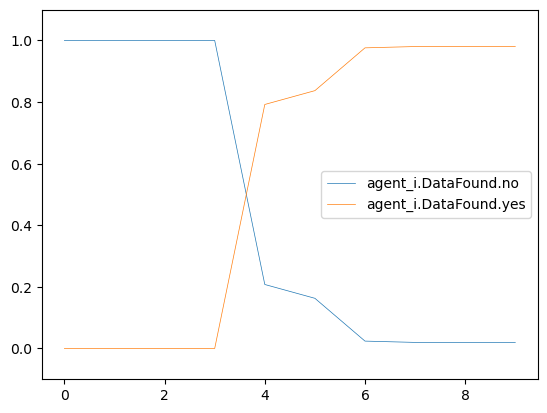

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.886692               0.113307       FileRecon   
5              0.184217               0.815783  ManipulateData   
6              0.000226               0.999774            Exit   
7              0.000226               0.999774             Nop   
8              0.000226               0.999774             Nop   
9              0.000226               0.999774             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

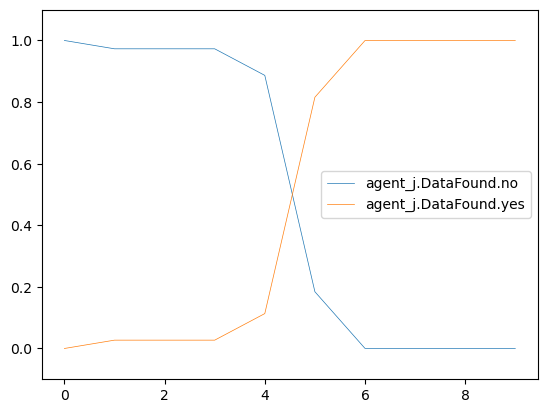

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop       FileRecon
5                 0.0                  1.0               Nop  ManipulateData
6                 0.0                  1.0               Nop            Exit
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

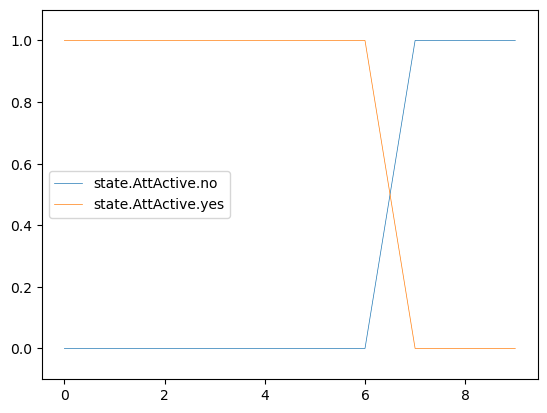

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998821e-01  DeployDataDecoys   
3          1.234496e-06           9.999988e-01               Nop   
4          9.572720e-08           1.000000e+00               Nop   
5          5.674802e-07           9.999995e-01               Nop   
6          9.313952e-03           9.906860e-01               Nop   
7          9.999127e-01           8.729670e-05               Nop   
8          9.999993e-01           6.489420e-07               Nop   
9          1.000000e+00           5.592878e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

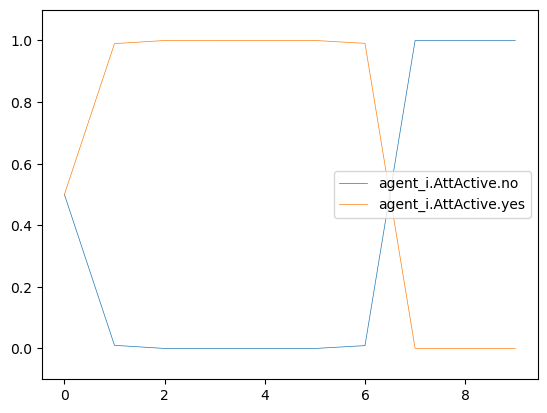

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0       FileRecon   
5                   0.0                    1.0  ManipulateData   
6                   0.0                    1.0            Exit   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

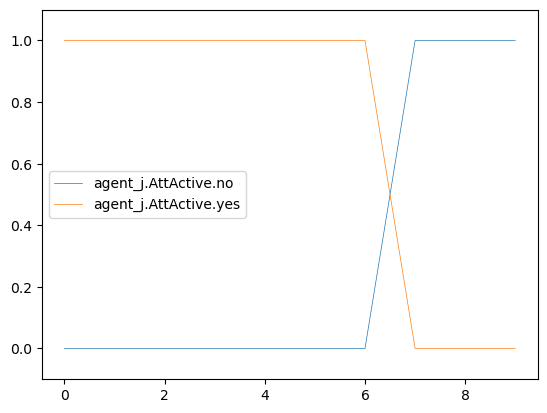

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop       FileRecon  
5                      1.0               Nop  ManipulateData  
6                      1.0               Nop            Exit  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

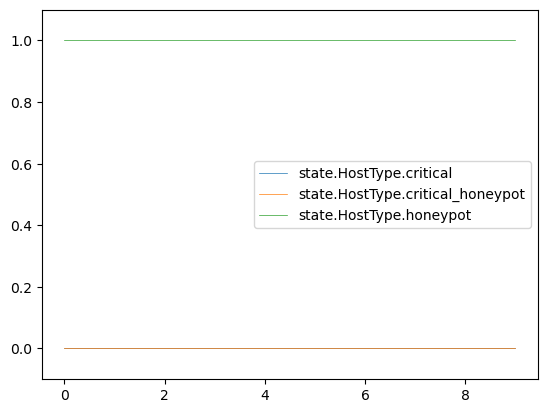

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop       FileRecon   
5                        1.0               Nop  ManipulateData   
6                        1.0               Nop            Exit   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                        file_enum  
5                       file_write  
6                             none  
7                             none  
8                             none  
9                             none

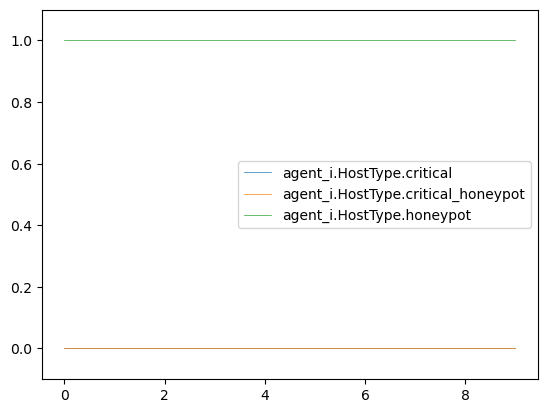

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.339934                                 0.0   
3                   0.333533                                 0.0   
4                   0.151904                                 0.0   
5                   0.024102                                 0.0   
6                   0.017012                                 0.0   
7                   0.017012                                 0.0   
8                   0.017012                                 0.0   
9                   0.017012                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.800000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.666467       FileRecon               Nop   
4                   0.848095       FileRecon               Nop   
5                   0.975898  ManipulateData               Nop   
6                   0.982988            Exit               Nop   
7                   0.982988             Nop               Nop   
8                   0.982988             Nop               Nop   
9                   0.982988             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           failure   
4                         none                           success   
5                         none                           success   
6                   user_files                           success   
7                   user_files                           success   
8                   user_files                           failure   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                       active  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

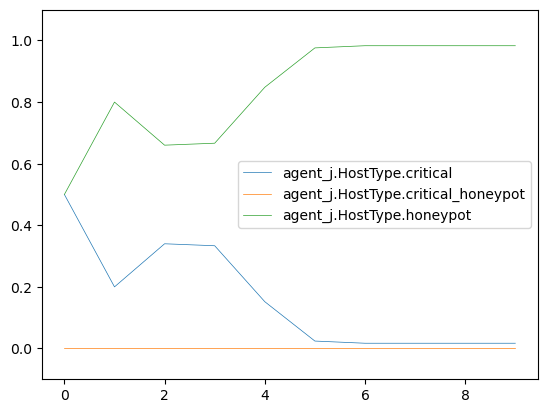

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop       FileRecon
5                0.0                 1.0               Nop  ManipulateData
6                0.0                 1.0               Nop            Exit
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

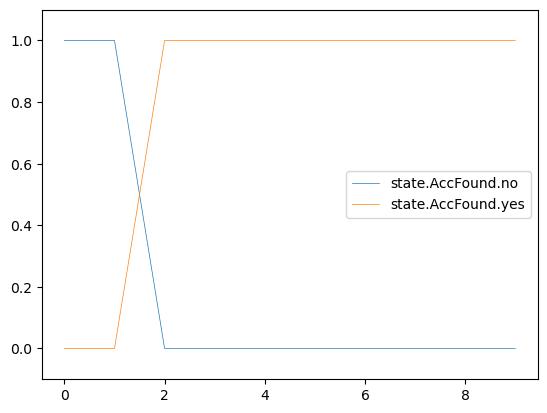

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.009686              0.990314               Nop   
4             0.009684              0.990316               Nop   
5             0.031845              0.968155               Nop   
6             0.006100              0.993900               Nop   
7             0.002542              0.997458               Nop   
8             0.002504              0.997496               Nop   
9             0.002504              0.997496               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4       FileRecon                        file_enum  
5  ManipulateData                       file_write  
6            Exit                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

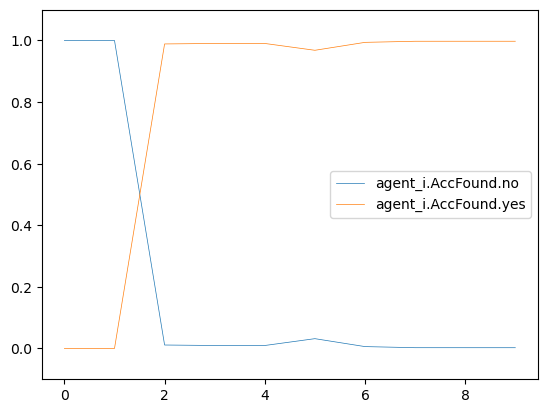

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898185      PrivEscAcc   
3             0.000113              0.999886       FileRecon   
4             0.000181              0.999819       FileRecon   
5             0.000078              0.999922  ManipulateData   
6             0.000037              0.999963            Exit   
7             0.000037              0.999963             Nop   
8             0.000037              0.999963             Nop   
9             0.000037              0.999963             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                   user_files   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           failure                       active  
4                           success                       active  
5                           success                       active  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

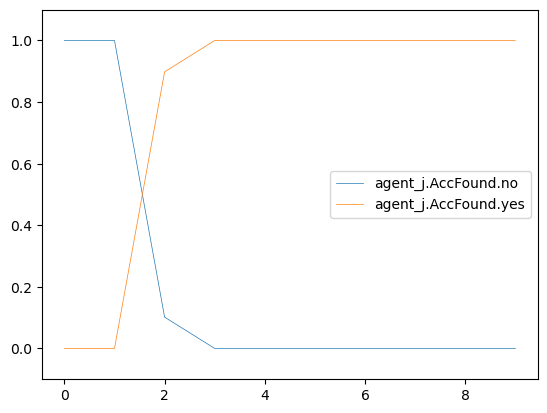

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

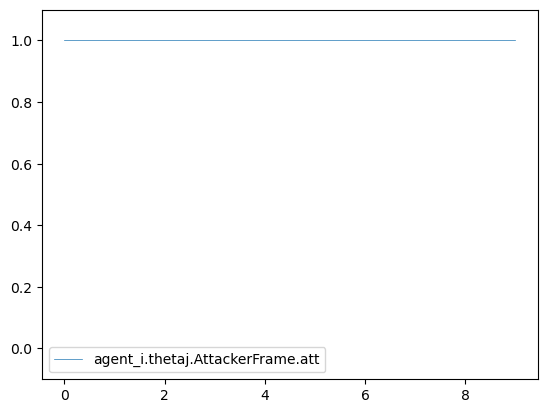

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.485316                        0.514684   
3                         0.484863                        0.515137   
4                         0.673551                        0.326449   
5                         0.713341                        0.286659   
6                         0.713341                        0.286659   
7                         0.713341                        0.286659   
8                         0.713341                        0.286659   
9                         0.713341                        0.286659   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

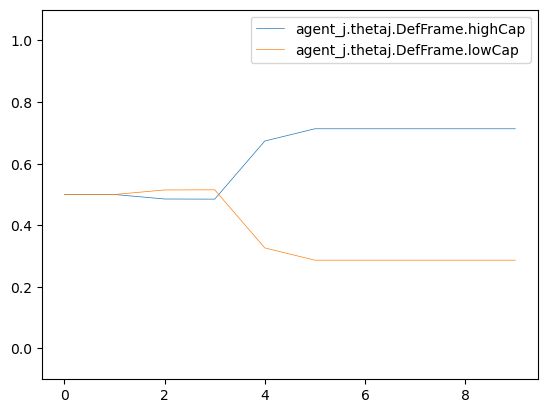

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

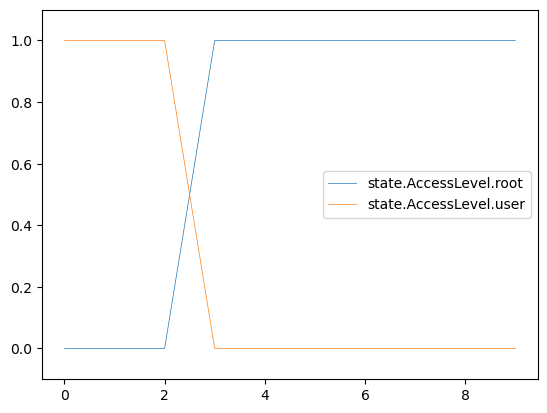

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.990261                  0.009739               Nop   
4                  0.990286                  0.009714               Nop   
5                  0.998555                  0.001445               Nop   
6                  0.998622                  0.001378               Nop   
7                  0.998622                  0.001378               Nop   
8                  0.998622                  0.001378               Nop   
9                  0.998622                  0.001378               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

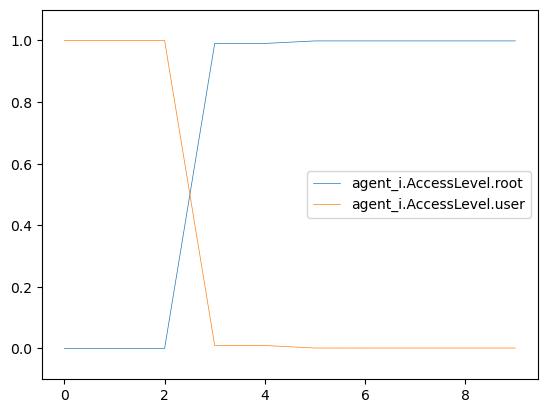

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.990893                  0.009107       FileRecon   
4                  0.995708                  0.004291  ManipulateData   
5                  0.996789                  0.003211            Exit   
6                  0.996788                  0.003211             Nop   
7                  0.996788                  0.003211             Nop   
8                  0.996788                  0.003211             Nop   
9                  0.996788                  0.003211             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

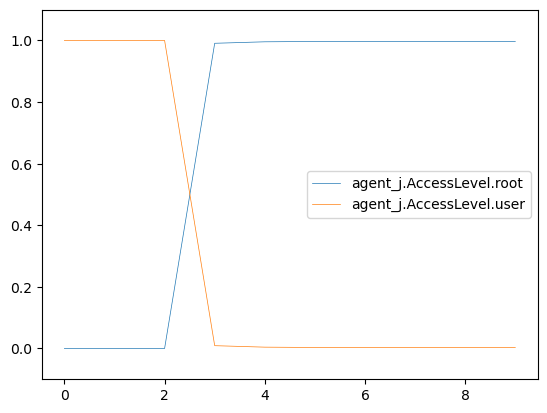

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

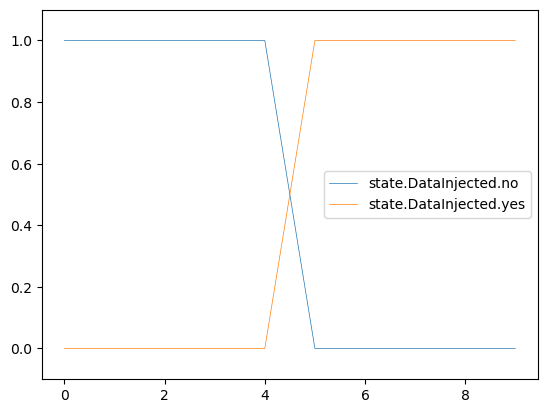

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031940                  0.968060               Nop   
6                 0.002792                  0.997208               Nop   
7                 0.002441                  0.997559               Nop   
8                 0.002440                  0.997560               Nop   
9                 0.002440                  0.997560               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

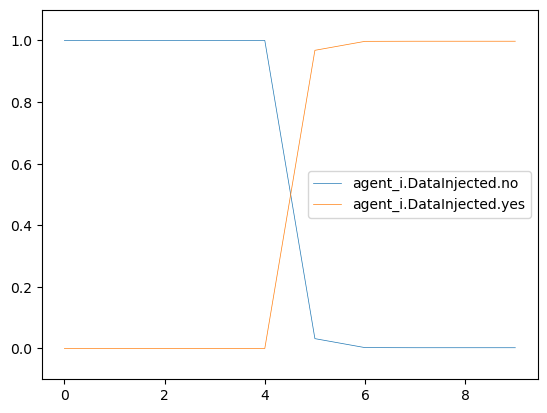

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000089                  0.999911            Exit   
6                 0.000089                  0.999911             Nop   
7                 0.000089                  0.999911             Nop   
8                 0.000089                  0.999911             Nop   
9                 0.000089                  0.999911             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

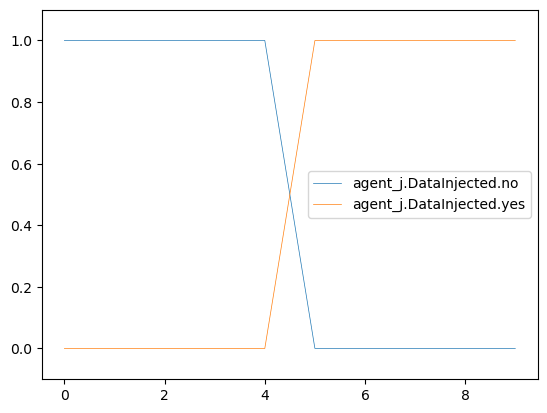

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

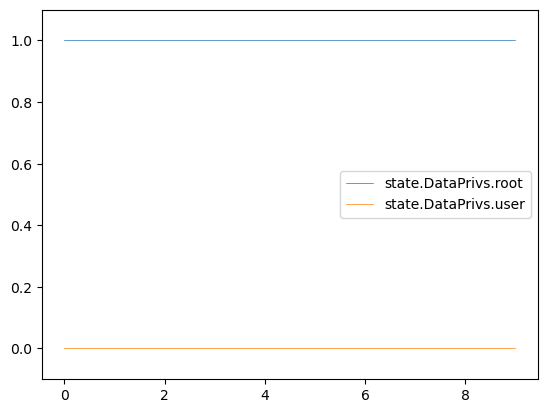

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

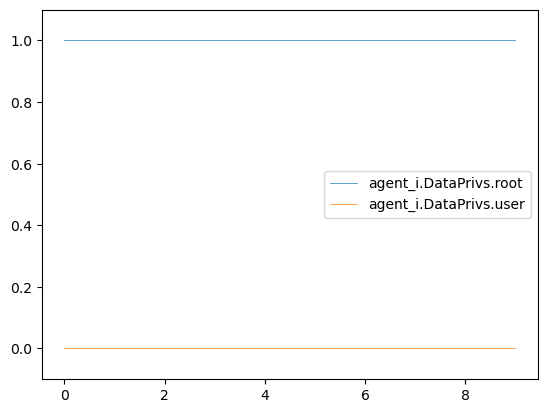

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.640283                0.359717  ManipulateData   
5                0.647498                0.352502            Exit   
6                0.647498                0.352502             Nop   
7                0.647498                0.352502             Nop   
8                0.647498                0.352502             Nop   
9                0.647498                0.352502             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

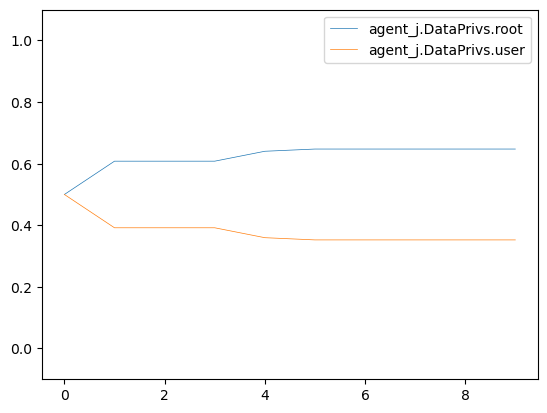

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

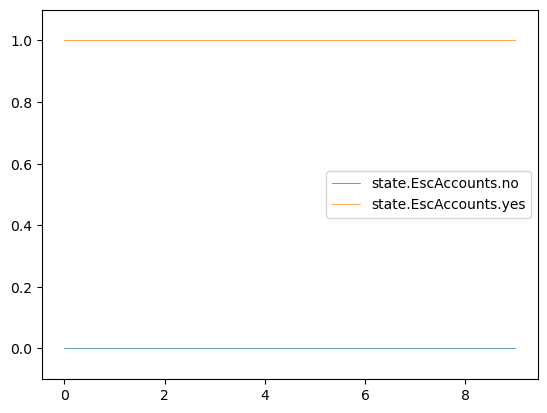

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

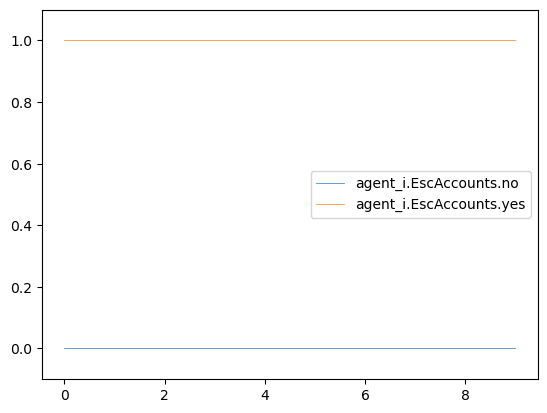

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.892857                 0.107143      PrivEscAcc   
3                0.009017                 0.990983       FileRecon   
4                0.004249                 0.995751  ManipulateData   
5                0.003180                 0.996820            Exit   
6                0.003180                 0.996820             Nop   
7                0.003180                 0.996820             Nop   
8                0.003180                 0.996820             Nop   
9                0.003180                 0.996820             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

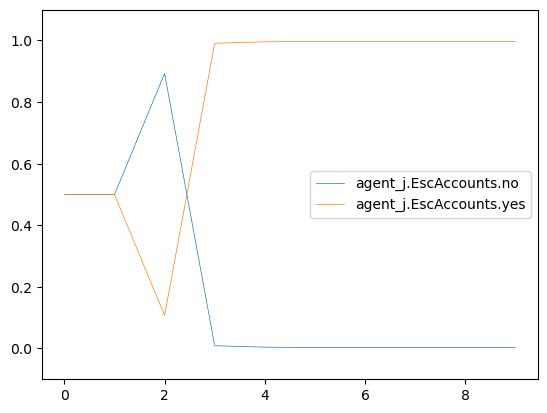

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

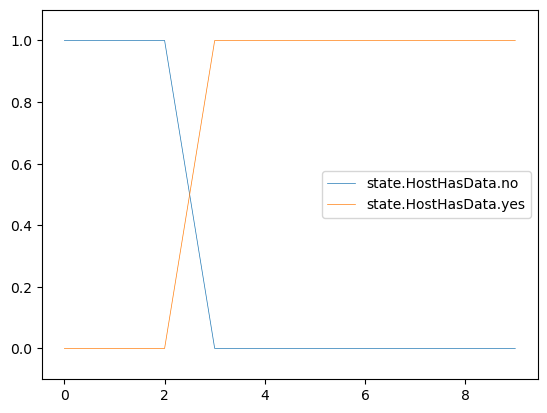

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

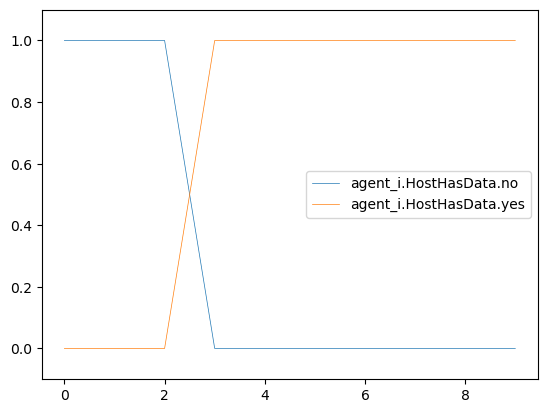

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.313512                 0.686488       FileRecon   
4                0.056203                 0.943797  ManipulateData   
5                0.000061                 0.999939            Exit   
6                0.000061                 0.999939             Nop   
7                0.000061                 0.999939             Nop   
8                0.000061                 0.999939             Nop   
9                0.000061                 0.999939             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

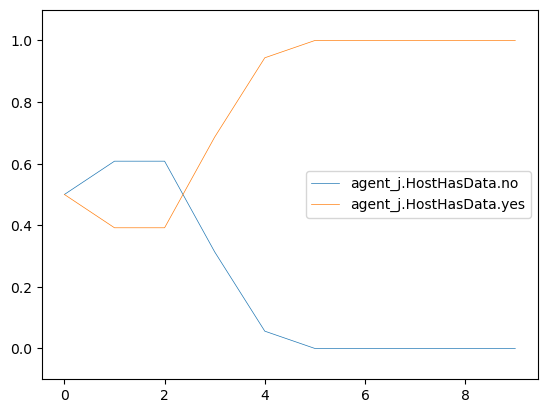

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

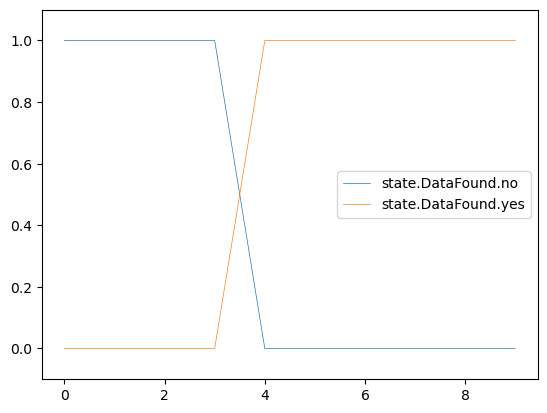

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.207772               0.792229               Nop   
5              0.028835               0.971165               Nop   
6              0.002507               0.997493               Nop   
7              0.002438               0.997562               Nop   
8              0.002438               0.997562               Nop   
9              0.002438               0.997562               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

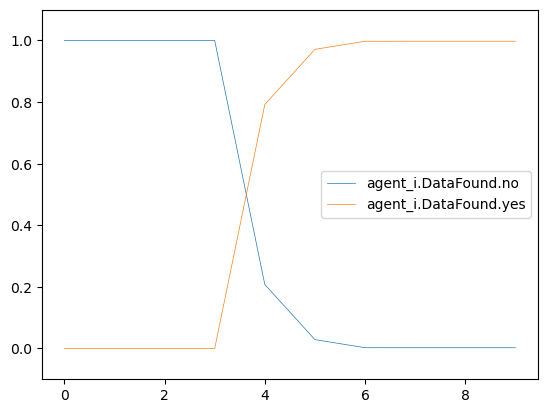

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.081265               0.918735  ManipulateData   
5              0.000089               0.999911            Exit   
6              0.000089               0.999911             Nop   
7              0.000089               0.999911             Nop   
8              0.000089               0.999911             Nop   
9              0.000089               0.999911             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

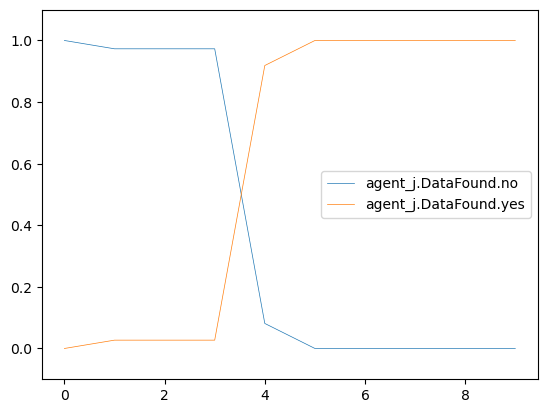

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

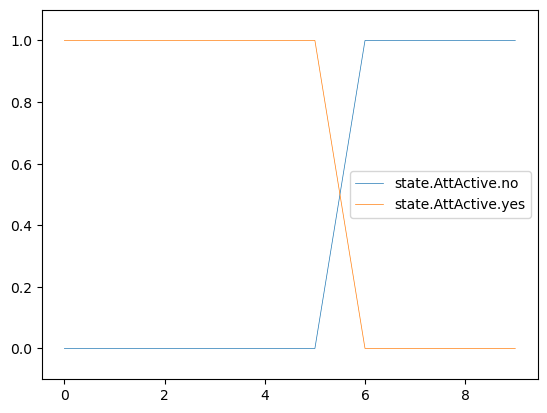

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998821e-01  DeployDataDecoys   
3          1.234496e-06           9.999988e-01               Nop   
4          9.572720e-08           1.000000e+00               Nop   
5          4.218627e-06           9.999957e-01               Nop   
6          9.995967e-01           4.032651e-04               Nop   
7          9.999953e-01           4.681677e-06               Nop   
8          9.999999e-01           1.462458e-08               Nop   
9          1.000000e+00           3.514800e-11               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

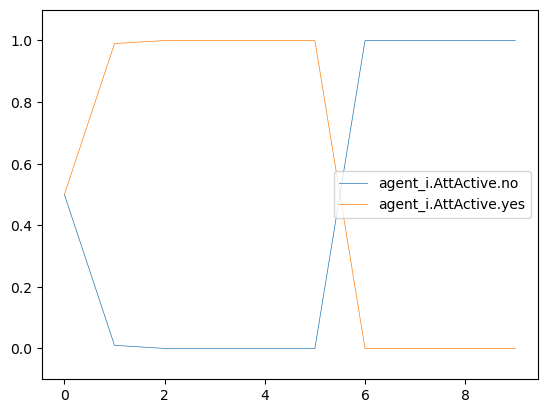

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

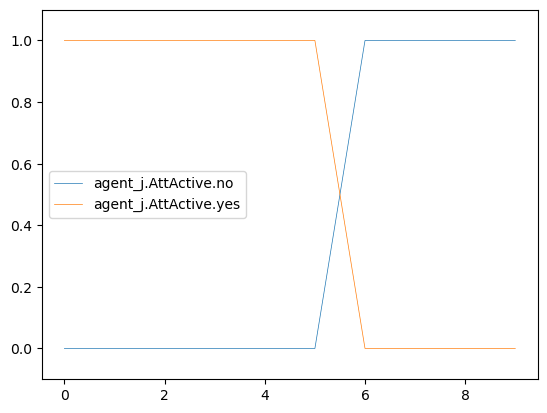

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

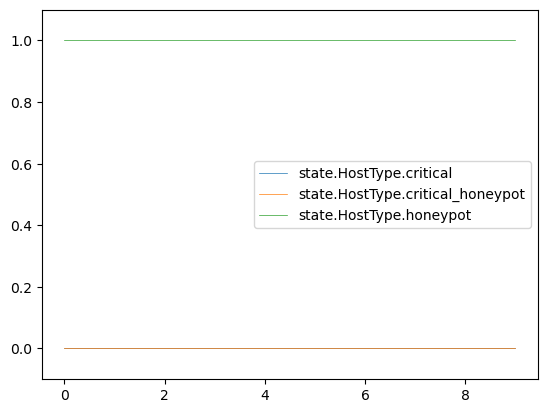

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

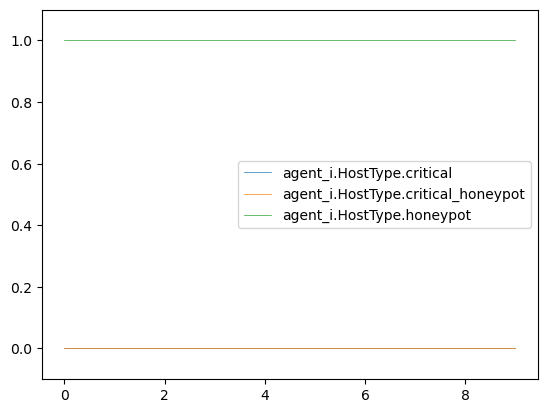

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.031184                                 0.0   
3                   0.030329                                 0.0   
4                   0.005027                                 0.0   
5                   0.004411                                 0.0   
6                   0.004411                                 0.0   
7                   0.004411                                 0.0   
8                   0.004411                                 0.0   
9                   0.004411                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.800000    EnumAccounts               Nop   
2                   0.968816      PrivEscAcc  DeployDataDecoys   
3                   0.969670       FileRecon               Nop   
4                   0.994973  ManipulateData               Nop   
5                   0.995589            Exit               Nop   
6                   0.995589             Nop               Nop   
7                   0.995589             Nop               Nop   
8                   0.995589             Nop               Nop   
9                   0.995589             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                   user_files                           success   
3                         none                           success   
4                         none                           success   
5                   user_files                           failure   
6                         none                           failure   
7                         none                           failure   
8                         none                           success   
9                         none                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

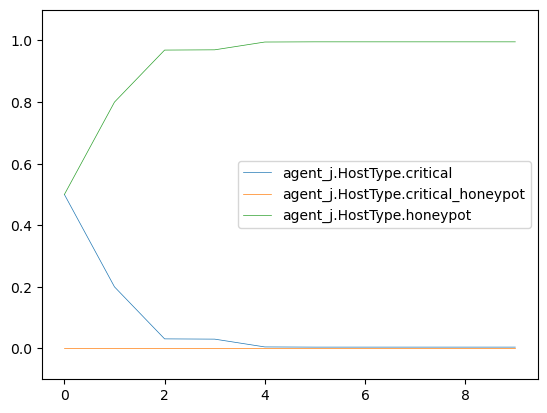

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

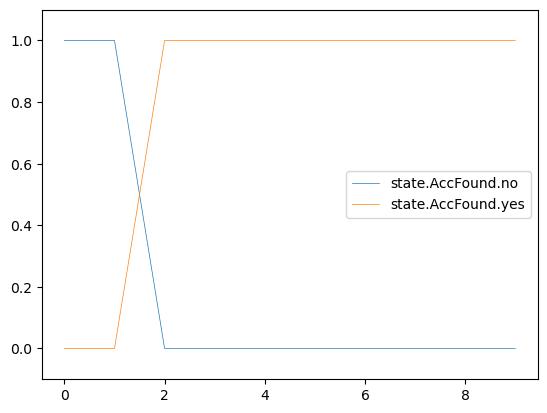

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.009686              0.990314               Nop   
4             0.009684              0.990316               Nop   
5             0.001439              0.998561               Nop   
6             0.001376              0.998624               Nop   
7             0.001375              0.998625               Nop   
8             0.001375              0.998625               Nop   
9             0.001375              0.998625               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

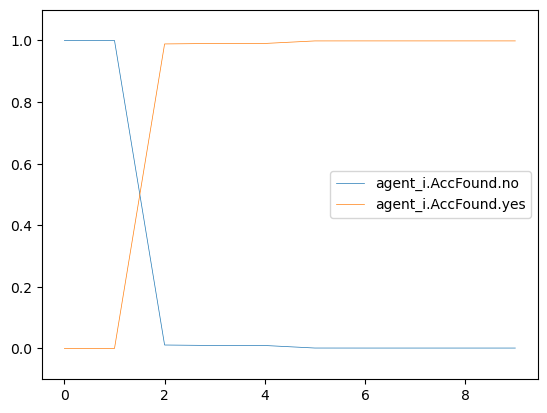

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.901786              0.098214      PrivEscAcc   
3             0.009107              0.990893       FileRecon   
4             0.004291              0.995708  ManipulateData   
5             0.003211              0.996789            Exit   
6             0.003211              0.996788             Nop   
7             0.003211              0.996788             Nop   
8             0.003211              0.996788             Nop   
9             0.003211              0.996788             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                         none   
2  DeployDataDecoys                   user_files   
3               Nop                         none   
4               Nop                         none   
5               Nop                   user_files   
6               Nop                         none   
7               Nop                         none   
8               Nop                         none   
9               Nop                         none   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           failure                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

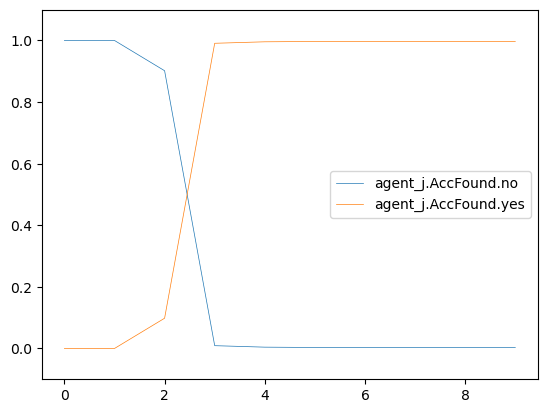

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                        file_enum
2                               1.0                         su_login
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                       file_write
8                               1.0                             none
9                               1.0                             none

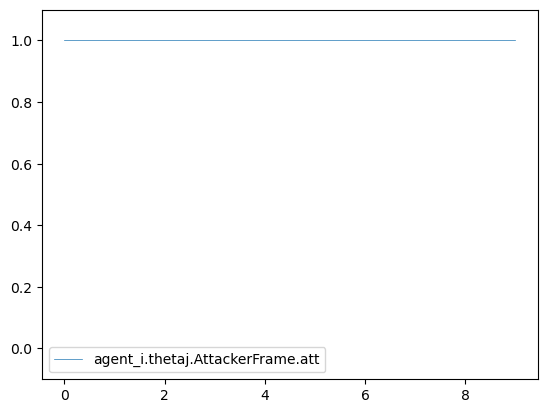

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.500000                        0.500000   
2                         0.339934                        0.660066   
3                         0.333533                        0.666467   
4                         0.626335                        0.373665   
5                         0.668767                        0.331233   
6                         0.668767                        0.331233   
7                         0.668767                        0.331233   
8                         0.668767                        0.331233   
9                         0.668767                        0.331233   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

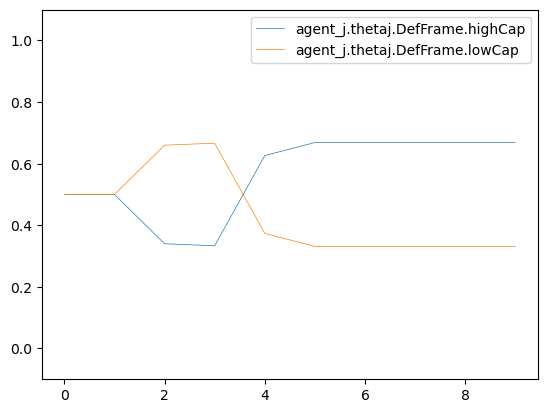

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0               Nop   
1                     0.0                     1.0               Nop   
2                     0.0                     1.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

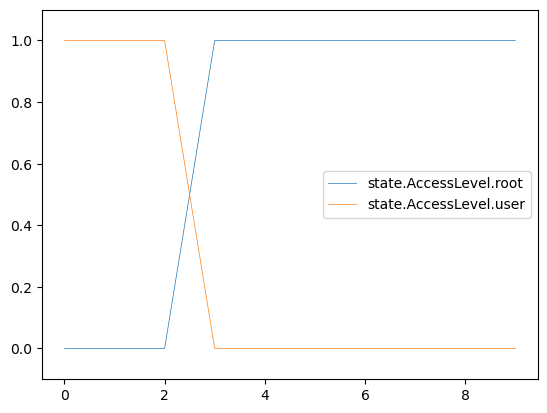

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.000000                  1.000000               Nop   
1                  0.000000                  1.000000               Nop   
2                  0.000000                  1.000000  DeployDataDecoys   
3                  0.990261                  0.009739               Nop   
4                  0.990286                  0.009714               Nop   
5                  0.998555                  0.001445               Nop   
6                  0.998622                  0.001378               Nop   
7                  0.998622                  0.001378               Nop   
8                  0.998622                  0.001378               Nop   
9                  0.998622                  0.001378               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

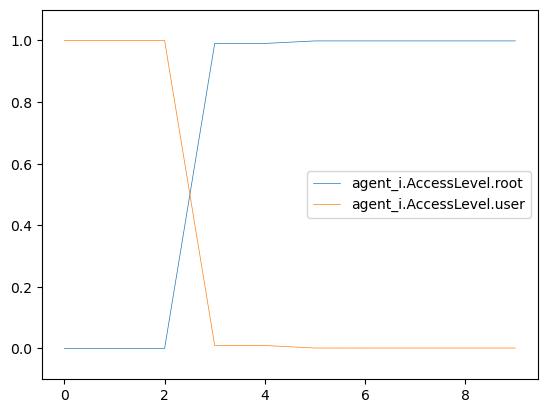

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000                  1.000000       FileRecon   
1                  0.000000                  1.000000    EnumAccounts   
2                  0.000000                  1.000000      PrivEscAcc   
3                  0.999886                  0.000113       FileRecon   
4                  0.999947                  0.000053  ManipulateData   
5                  0.999961                  0.000039            Exit   
6                  0.999961                  0.000039             Nop   
7                  0.999961                  0.000039             Nop   
8                  0.999961                  0.000039             Nop   
9                  0.999961                  0.000039             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

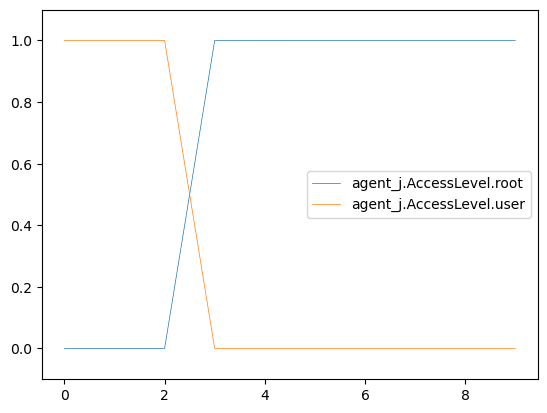

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0               Nop   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

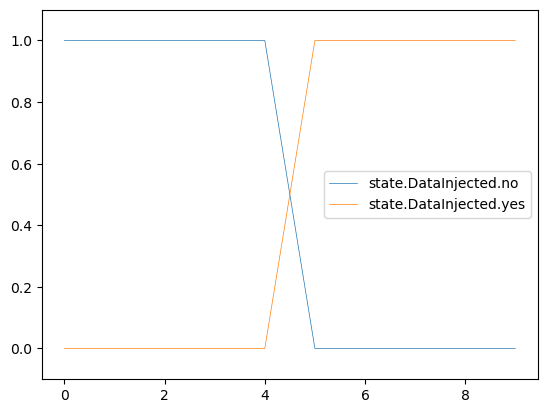

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000               Nop   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031940                  0.968060               Nop   
6                 0.002792                  0.997208               Nop   
7                 0.002441                  0.997559               Nop   
8                 0.002440                  0.997560               Nop   
9                 0.002440                  0.997560               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

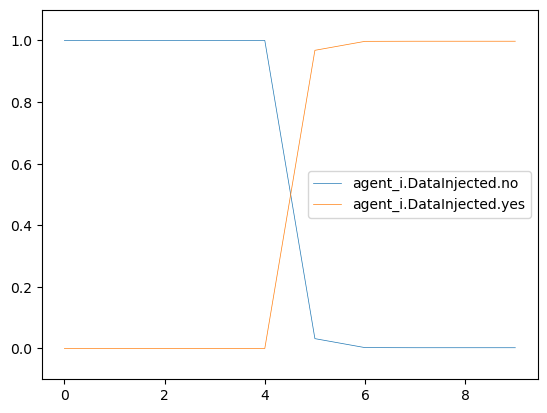

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000       FileRecon   
1                 1.000000                  0.000000    EnumAccounts   
2                 1.000000                  0.000000      PrivEscAcc   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000097                  0.999903            Exit   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

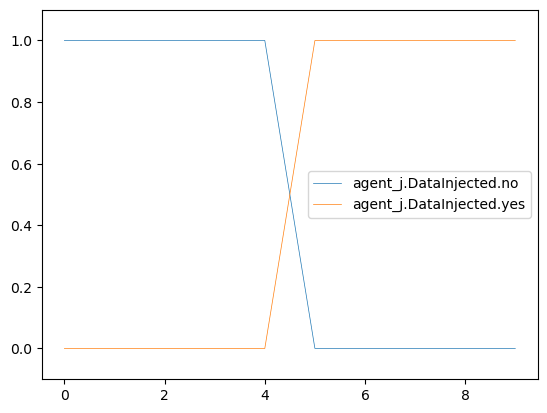

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0               Nop   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

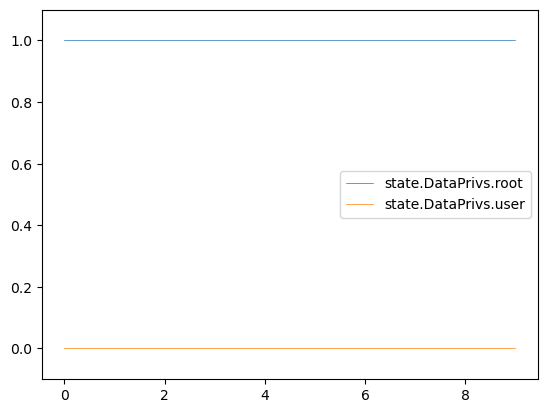

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0               Nop   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

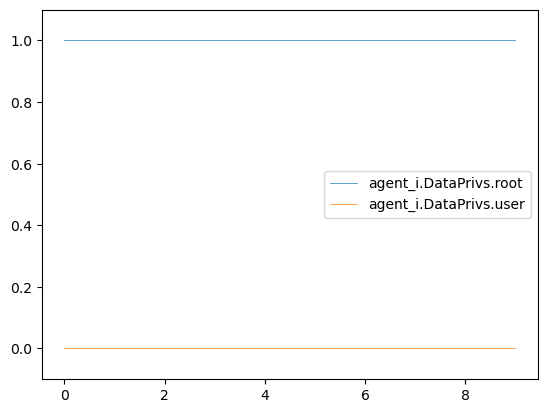

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                0.500000                0.500000       FileRecon   
1                0.608108                0.391892    EnumAccounts   
2                0.608108                0.391892      PrivEscAcc   
3                0.608108                0.391892       FileRecon   
4                0.647412                0.352588  ManipulateData   
5                0.656582                0.343418            Exit   
6                0.656582                0.343418             Nop   
7                0.656582                0.343418             Nop   
8                0.656582                0.343418             Nop   
9                0.656582                0.343418             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

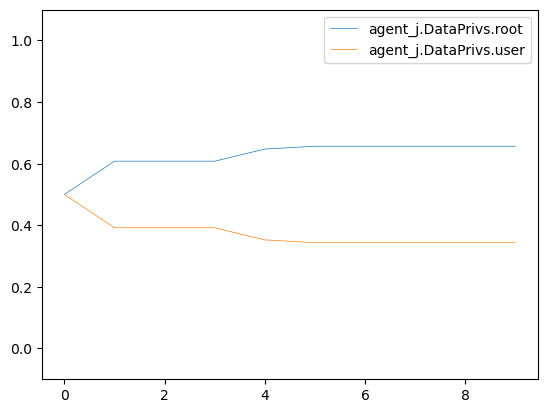

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0               Nop   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

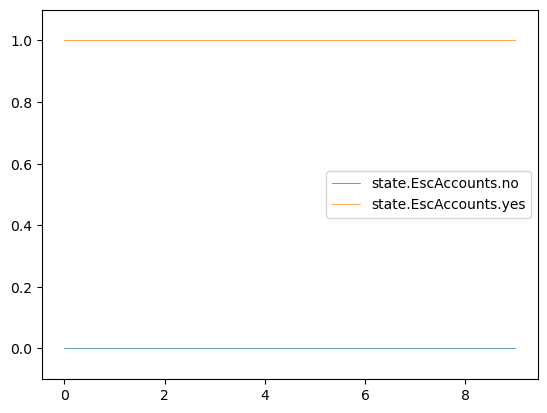

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     0.0                      1.0               Nop   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

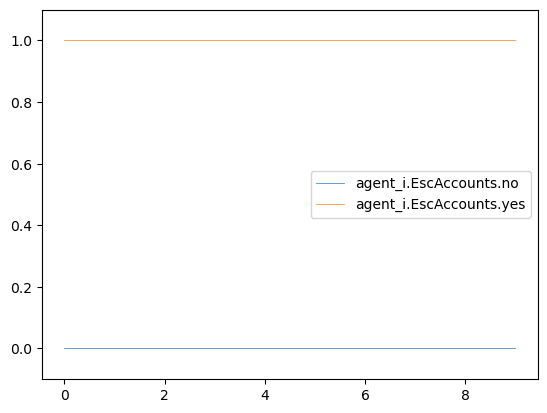

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.500000                 0.500000    EnumAccounts   
2                0.100806                 0.899193      PrivEscAcc   
3                0.000112                 0.999888       FileRecon   
4                0.000053                 0.999947  ManipulateData   
5                0.000039                 0.999961            Exit   
6                0.000039                 0.999962             Nop   
7                0.000039                 0.999961             Nop   
8                0.000039                 0.999961             Nop   
9                0.000039                 0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

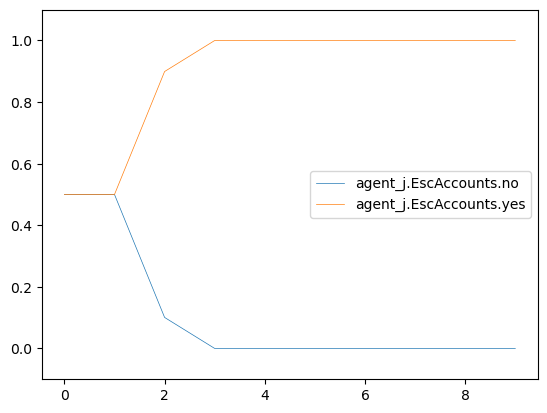

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0               Nop   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0       FileRecon  
1    EnumAccounts  
2      PrivEscAcc  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

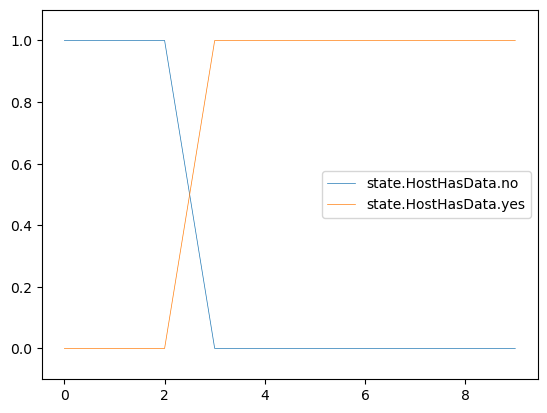

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0               Nop   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

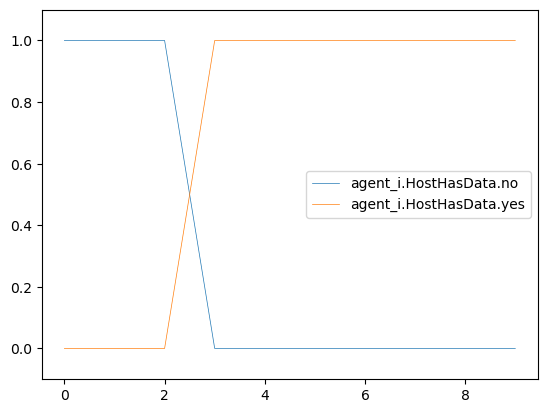

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000       FileRecon   
1                0.608108                 0.391892    EnumAccounts   
2                0.608108                 0.391892      PrivEscAcc   
3                0.405628                 0.594372       FileRecon   
4                0.064020                 0.935980  ManipulateData   
5                0.000070                 0.999930            Exit   
6                0.000070                 0.999930             Nop   
7                0.000070                 0.999930             Nop   
8                0.000070                 0.999930             Nop   
9                0.000070                 0.999930             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

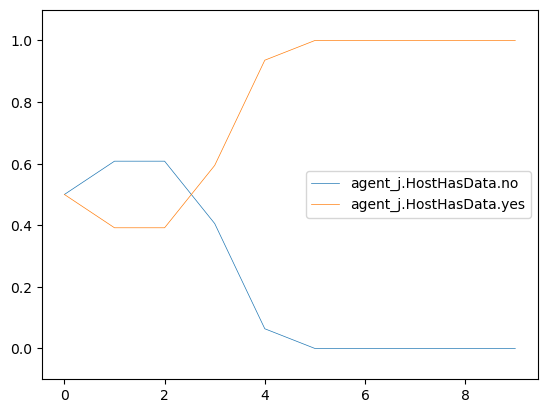

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0               Nop       FileRecon
1                 1.0                  0.0               Nop    EnumAccounts
2                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

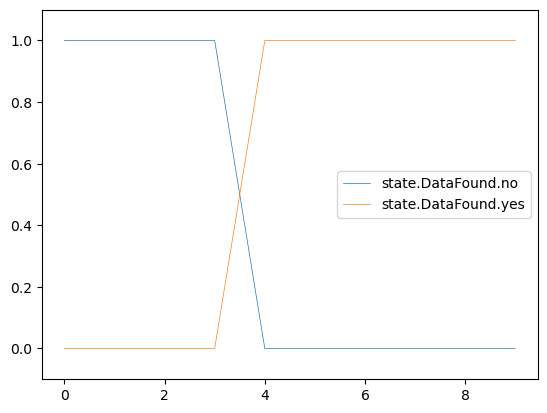

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000               Nop   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.207772               0.792229               Nop   
5              0.028835               0.971165               Nop   
6              0.002507               0.997493               Nop   
7              0.002438               0.997562               Nop   
8              0.002438               0.997562               Nop   
9              0.002438               0.997562               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

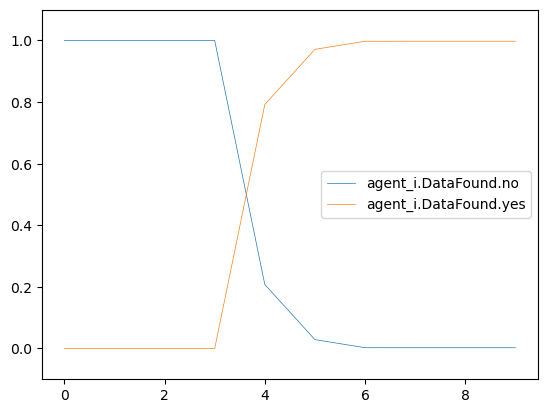

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000       FileRecon   
1              0.972973               0.027027    EnumAccounts   
2              0.972973               0.027027      PrivEscAcc   
3              0.972973               0.027027       FileRecon   
4              0.088100               0.911900  ManipulateData   
5              0.000097               0.999903            Exit   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

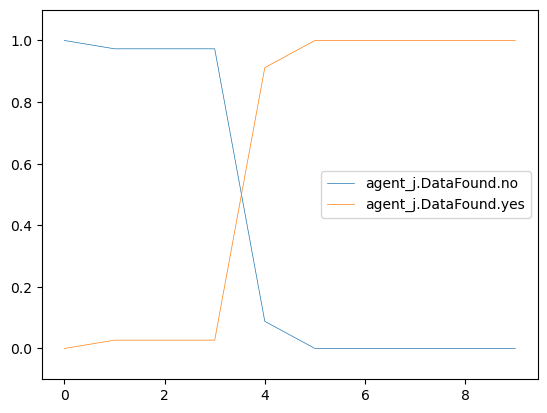

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0               Nop       FileRecon
1                 0.0                  1.0               Nop    EnumAccounts
2                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

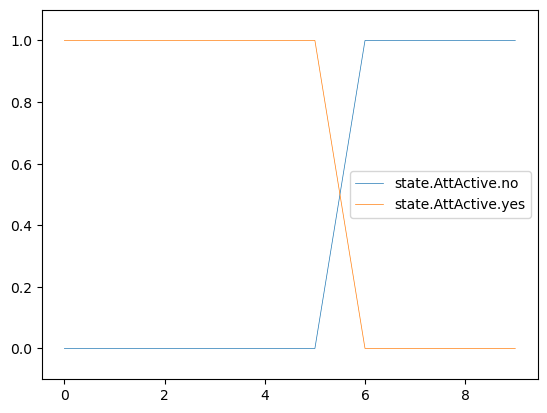

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01               Nop   
1          1.020408e-02           9.897959e-01               Nop   
2          1.179412e-04           9.998821e-01  DeployDataDecoys   
3          1.234496e-06           9.999988e-01               Nop   
4          9.572720e-08           1.000000e+00               Nop   
5          4.218627e-06           9.999957e-01               Nop   
6          9.995967e-01           4.032651e-04               Nop   
7          9.999953e-01           4.681677e-06               Nop   
8          9.999955e-01           4.529712e-06               Nop   
9          1.000000e+00           1.036149e-09               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

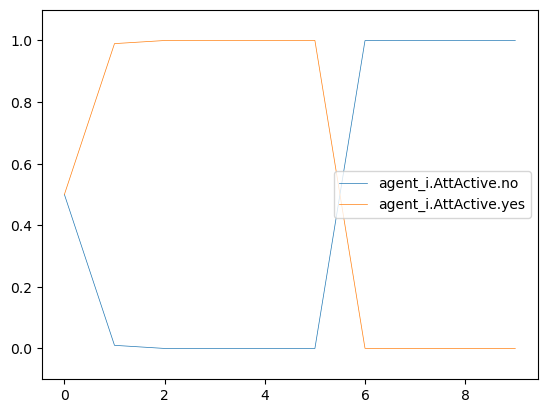

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0       FileRecon   
1                   0.0                    1.0    EnumAccounts   
2                   0.0                    1.0      PrivEscAcc   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

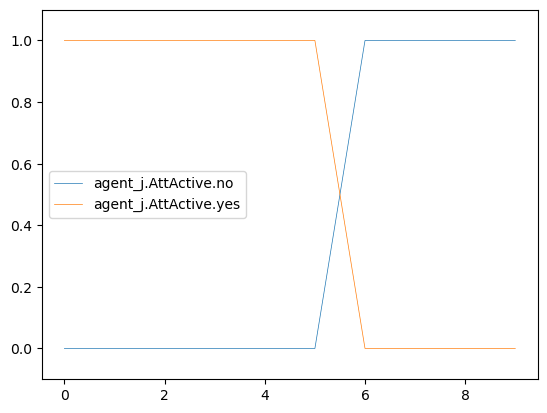

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0               Nop       FileRecon  
1                      1.0               Nop    EnumAccounts  
2                      1.0  DeployDataDecoys      PrivEscAcc  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

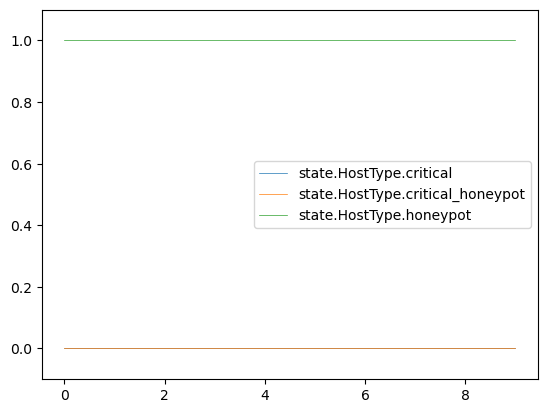

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0               Nop       FileRecon   
1                        1.0               Nop    EnumAccounts   
2                        1.0  DeployDataDecoys      PrivEscAcc   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                        file_enum  
2                         su_login  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                       file_write  
8                             none  
9                             none

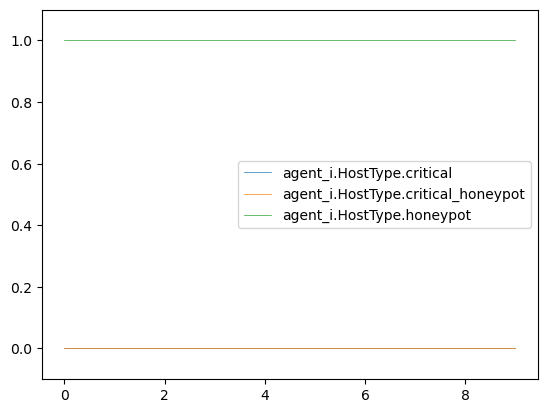

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.200000                                 0.0   
2                   0.339934                                 0.0   
3                   0.333533                                 0.0   
4                   0.074800                                 0.0   
5                   0.066262                                 0.0   
6                   0.066262                                 0.0   
7                   0.066262                                 0.0   
8                   0.066262                                 0.0   
9                   0.066262                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000       FileRecon               Nop   
1                   0.800000    EnumAccounts               Nop   
2                   0.660066      PrivEscAcc  DeployDataDecoys   
3                   0.666467       FileRecon               Nop   
4                   0.925200  ManipulateData               Nop   
5                   0.933738            Exit               Nop   
6                   0.933738             Nop               Nop   
7                   0.933738             Nop               Nop   
8                   0.933738             Nop               Nop   
9                   0.933738             Nop               Nop   

  agent_j.observation.HostObs' agent_j.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           success   
2                         none                           success   
3                         none                           success   
4                         none                           success   
5                         none                           failure   
6                   user_files                           failure   
7                   user_files                           failure   
8                         none                           success   
9                   user_files                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

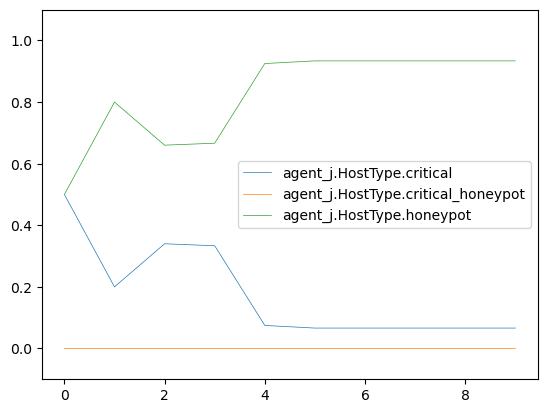

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0               Nop       FileRecon
1                1.0                 0.0               Nop    EnumAccounts
2                0.0                 1.0  DeployDataDecoys      PrivEscAcc
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

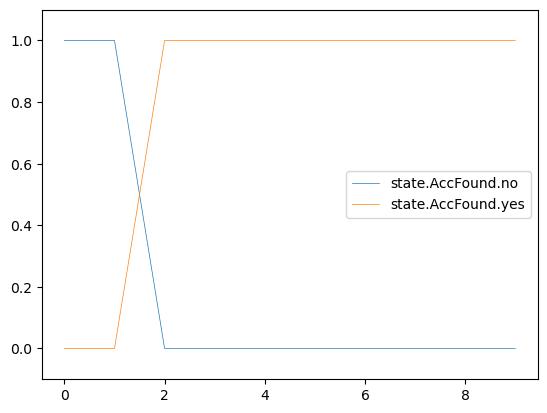

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000               Nop   
1             1.000000              0.000000               Nop   
2             0.011249              0.988751  DeployDataDecoys   
3             0.009686              0.990314               Nop   
4             0.009684              0.990316               Nop   
5             0.001439              0.998561               Nop   
6             0.001376              0.998624               Nop   
7             0.001375              0.998625               Nop   
8             0.001375              0.998625               Nop   
9             0.001375              0.998625               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0       FileRecon                        file_enum  
1    EnumAccounts                        file_enum  
2      PrivEscAcc                         su_login  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                       file_write  
8             Nop                             none  
9             Nop                             none

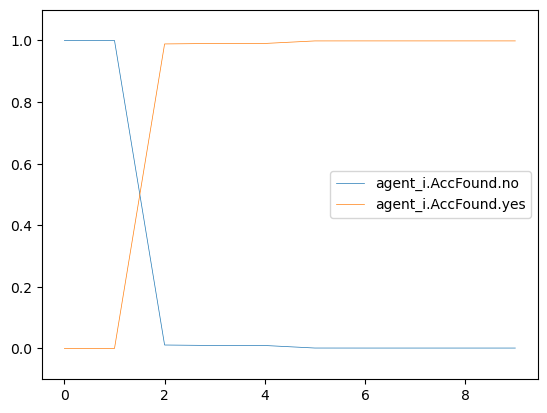

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0             1.000000              0.000000       FileRecon   
1             1.000000              0.000000    EnumAccounts   
2             0.101815              0.898185      PrivEscAcc   
3             0.000113              0.999886       FileRecon   
4             0.000053              0.999947  ManipulateData   
5             0.000039              0.999961            Exit   
6             0.000039              0.999961             Nop   
7             0.000039              0.999961             Nop   
8             0.000039              0.999961             Nop   
9             0.000039              0.999961             Nop   

     agent_i.action agent_j.observation.HostObs'  \
0               Nop                         none   
1               Nop                   user_files   
2  DeployDataDecoys                         none   
3               Nop                         none   
4               Nop                         none   
5               Nop                         none   
6               Nop                   user_files   
7               Nop                   user_files   
8               Nop                         none   
9               Nop                   user_files   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           failure                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           failure                     inactive  
7                           failure                     inactive  
8                           success                     inactive  
9                           success                     inactive

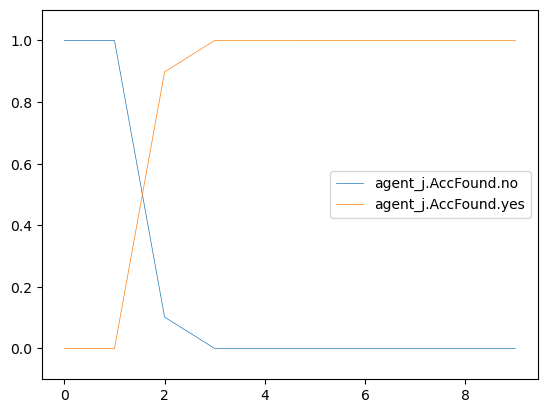

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)
    

# Get divergence
def print_divergence():
    divs = []
    
    for trace in TRACE_FILES:
        data = load_json(trace)
    
        dataframe = pandas.json_normalize(data)    
        state_vars = get_state_vars(dataframe.columns)
        
        agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
        agent_j_data = filter_columns_by_agent(dataframe, "agent_j")

    for i in range(len(keys)):
        print(f"Plotting for {keys[i]}")

        i_means = numpy.mean(divs[i][0], axis=0)
        i_dev = numpy.std(divs[i][0], axis=0)
        plotter.errorbar(numpy.linspace(1, i_means.shape[0], i_means.shape[0]), i_means, fmt='r-.', yerr=i_dev, linewidth=0.5)

        if len(divs[i]) > 1:
            j_means = numpy.mean(divs[i][1], axis=0)
            j_dev = numpy.std(divs[i][1], axis=0)
            plotter.errorbar(numpy.linspace(1, j_means.shape[0], j_means.shape[0]), j_means, fmt='b-.', yerr=j_dev, linewidth=0.5)
            # plotter.plot(divs[i][1].T, 'b-.', linewidth=0.5)

        plotter.ylim(-0.1, 2)
        plotter.show()

    